<a href="https://colab.research.google.com/github/SC30GSWNBA/Mercari_Price_Suggestion_Challenge/blob/main/Mercari_Price_Suggestion_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mercari, the community-powered shopping app price suggestion.**
Product pricing gets even harder at scale, considering just how many products are sold online. Clothing has strong seasonal pricing trends and is heavily influenced by brand names, while electronics have fluctuating prices based on product specs.

**Problem Statement:**
The objective of this project is to gain insights into the factors influencing the sale price of an item listing based on the information provided by a user. By performing exploratory data analysis (EDA) and conducting statistical and probabilistic analysis on a dataset of item listings and associated user-provided information

**About data:**
You'll be provided user-inputted text descriptions of their products, including details like product category name, brand name, and item condition.
Go through this link to explore the public data repository.
https://www.kaggle.com/competitions/mercari-price-suggestion-challenge/data


# **1. Importing Libraries and Dataset**

### ***A. Importing Relevant Libraries***

In [ ]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import f
import io
import gdown
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from scipy.sparse import hstack
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error
import re
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### ***B. Loading Data into Colab***

In [ ]:
!gdown '1ZLY9psuJTP4AfaXdbsB03FWEz8PLDeSo'

Downloading...
From: https://drive.google.com/uc?id=1ZLY9psuJTP4AfaXdbsB03FWEz8PLDeSo
To: /content/train.tsv
100% 338M/338M [00:01<00:00, 242MB/s]


### ***C. Reading the Input File***

In [ ]:
mercari_df = pd.read_csv('/content/train.tsv', sep = '\t')

# **2. Exploratory Data Analysis**

### ***A. Inspecting First Few Rows of the DataFrame***

In [ ]:
mercari_df.head(10)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...


### ***B. Information about the dataframes***

In [ ]:
mercari_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


**Observation:**

    - So, category_name, brand_name and item_description have missing values in the dataset

### ***D. Unique Values in each column***

Before we move ahead, let's identify the number of unique values in each column

In [ ]:
for i in mercari_df.columns:
  print(f'{i} has {mercari_df[i].nunique()} unique values')

train_id has 1482535 unique values
name has 1225273 unique values
item_condition_id has 5 unique values
category_name has 1287 unique values
brand_name has 4809 unique values
price has 828 unique values
shipping has 2 unique values
item_description has 1281426 unique values


**Action Items:**

    - We can drop the train_id column as it only has index values**

In [ ]:
mercari_df.drop(columns = ['train_id'], inplace = True)

### ***E. Checking Duplicate Rows***

Before we move ahead, let's identify if there are any duplicate rows

In [ ]:
mercari_df.duplicated().any()

True

**Observation:**

    - So, there are rows which are duplicated**

In [ ]:
len(mercari_df[mercari_df.duplicated()])

49

**Action Items:**

    - We have nearly 49 rows which are duplicated, and we need to remove them before we go ahead with further analysis on dataset**

In [ ]:
mercari_df.drop_duplicates(keep="first", inplace = True)

# **3. Data Preprocessing**

### ***A. Imputing Missing Values***

In [ ]:
for x in list(mercari_df.columns):

  if mercari_df[x].isna().sum() > 0:

    print(f'{x} has {mercari_df[x].isna().sum()} missing values or {round(mercari_df[x].isna().sum()*100.0/len(mercari_df),2)} percentage of missing values')

category_name has 6327 missing values or 0.43 percentage of missing values
brand_name has 632641 missing values or 42.67 percentage of missing values
item_description has 4 missing values or 0.0 percentage of missing values


**Action Items:**

    - Imputing category_name, brand_name, item_description with 'Not_Available' for missing values

In [ ]:
mercari_df.category_name.fillna('NotAvailable', inplace=True)
mercari_df.brand_name.fillna('NotAvailable', inplace=True)
mercari_df.item_description.fillna('NotAvailable', inplace=True)

###***B. Data Standardization***

**Action Items:**

    - There are too many duplicate entries in name, brand_name, sub_category & sub_category3. We need to create
    unique values in that column for similar entries to standardize the dataset.

In [ ]:
mercari_df['name'] = mercari_df['name'].str.lower()

In [ ]:
mercari_df['brand_name'] = mercari_df['brand_name'].str.lower()

In [ ]:
mercari_df['brand_name'].replace(to_replace=['47', '47 brand'], value="47 brand", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['georgio armani', 'armani jeans', \
                                             'giorgio armani', 'a|x armani exchange', \
                                             'a/x armani exchange', 'armani exchange', \
                                             'armani collezioni', 'armani', \
                                             'emporio armani'], \
                                 value="armani", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['abercrombie & fitch', 'abercrombie kids'], \
                                 value="abercrombie & fitch", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['adidas', 'adidas originals', \
                                             'adidas by stella mccartney', 'adidas neo', \
                                             'jeremy scott x adidas'], \
                                 value="adidas", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['aeropostale', 'aéropostale'], \
                                 value="aeropostale", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['akris', 'akris punto'], \
                                 value="akris", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['alo', 'alo yoga'], \
                                 value="alo yoga", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['amazon', 'amazon essentials','amazonbasics'], \
                                 value="amazon", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['alternative', 'alternative apparel', ], \
                                 value="alternative apparel", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['and', 'and1'], \
                                 value="and1", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['apt. 9', 'apt.'], \
                                 value="apt. 9", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['avon', 'avon cosmetics, inc'], \
                                 value="avon", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['babies r us', 'babies r us infant','babies r us plush'], \
                                 value="babies r us", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['bailey', 'bailey 44'], \
                                 value="bailey 44", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['bandai', 'bandai namco'], \
                                 value="bandai namco", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['bare minerals', 'bareminerals'], \
                                 value="bare minerals", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['bcbg', 'bcbg max azria', 'bcbgmaxazria', 'bcbgeneration','bcbgirls'], \
                                 value="bcbg", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['beats by dr. dre', 'beats'], \
                                 value="beats by dr. dre", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['bebe', 'bebe stores'], \
                                 value="bebe stores", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['becca', 'becca cosmetics'], \
                                 value="becca", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['benefit', 'benefit cosmetics'], \
                                 value="benefit cosmetics", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['betsey johnson', 'betsey johnson label'], \
                                 value="betsey johnson", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['bioworld','bioworld merchandising'], \
                                 value="bioworld merchandising", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['blackhawk','blackhawk!'], \
                                 value="blackhawk", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['blank','blank nyc','blanknyc'], \
                                 value="blank nyc", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['boohoo','boohoo petite','boohoo plus'], \
                                 value="boohoo", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['boudreauxs butt paste','boudreaux'], \
                                 value="boudreauxs butt paste", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['brighton','brighton collectibles'], \
                                 value="brighton collectibles", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['buffalo','buffalo david bitton','buffalo jeans'], \
                                 value="buffalo jeans", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['burberry','burberry brit','burberry london'], \
                                 value="burberry", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=['buxton','buxton leather goods'], \
                                 value="buxton leather goods", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["celine","céline"], \
                                 value="celine", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["chloe","chloé"], \
                                 value="chloé", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["citizens of humanity","citizens of humanity jeans"], \
                                 value="citizens of humanity", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["colourpop","colourpop cosmetics"], \
                                 value="colourpop cosmetics", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["converse","converse shoes"], \
                                 value="converse", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["coty","coty, inc."], \
                                 value="coty, inc.", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["covergirl","cover girl"], \
                                 value="cover girl", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["disney","disney baby", \
                                             "disney collection", 'disney interactive', \
                                             "disney jr.", "disney pixar", \
                                             "disney pixar cars", "disney pixar planes", \
                                             "disney press", "disney princess", \
                                             "disney tsum tsum", "walt disney studios home entertainment", \
                                             "walt disney studios home entertainment"], \
                                 value="disney", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["dkny","dkny jeans"], \
                                 value="dkny", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["dl","dl1961"], \
                                 value="dl1961", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["dreamworks","dreamworks animated"], \
                                 value="dreamworks", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["earl jean","earl jeans"], \
                                 value="earl jeans", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["eddie bauer","eddie bauer clothing"], \
                                 value="eddie bauer clothing", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["enyce","enyce clothing"], \
                                 value="enyce clothing", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["eo","eo essential oils"], \
                                 value="eo essential oils", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["fila sport","fila sport"], \
                                 value="fila", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["fisher-price","fisher-price baby"], \
                                 value="fisher-price", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["ford","ford motorsport"], \
                                 value="ford motorsport", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["fox","fox racing"], \
                                 value="fox racing", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["fubu","fubu apparel"], \
                                 value="fubu", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["fuji","fujifilm"], \
                                 value="fujifilm", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["gap","gap inc."], \
                                 value="gap inc.", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["geneva","geneva platinum"], \
                                 value="geneva platinum", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["gerber","gerber childrenswear", \
                                 "gerber foods", "gerber good start"], \
                                 value="gerber", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["glo","glo clothing", \
                                 "glo jeans"], \
                                 value="glo clothing", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["guess","guess by marciano"], \
                                 value="guess", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["hanna anderson","hanna andersson"], \
                                 value="hanna andersson", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["hard candy","hard candy cosmetics"], \
                                 value="hard candy cosmetics", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["hasbro","hasbro games"], \
                                 value="hasbro", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["heritage","heritage 1981"], \
                                 value="heritage 1981", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["hermes","hermès"], \
                                 value="hermès", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["hill's ideal balance","hill's science diet"], \
                                 value="hill's science diet", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["hollister","hollister co."], \
                                 value="hollister co.", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["hudson","hudson jeans"], \
                                 value="hudson jeans", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["huggies","huggies goodnites", \
                                             "huggies little movers", 'huggies little snugglers', \
                                             "huggies little swimmers", "huggies one & done", \
                                             "huggies pull-ups", "huggies snug & dry"], \
                                 value="huggies", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["hugo","hugo boss"], \
                                 value="hugo boss", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["hunter","hunter boots"], \
                                 value="hunter boots", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["imagine","imagine baby"], \
                                 value="imagine baby", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["invicta","invicta watch group"], \
                                 value="invicta watch group", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["jag","jag jeans"], \
                                 value="jag jeans", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["jeffery campbell","jeffrey campbell"], \
                                 value="jeffrey campbell", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["john varvatos","john varvatos collection", \
                                 "john varvatos star usa"], \
                                 value="john varvatos", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["air jordan","jordan", \
                                 "jordans"], \
                                 value="jordans", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["jou jou","joujou"], \
                                 value="jou jou", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["junk food","junk food clothing"], \
                                 value="junk food clothing", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["kat von d","kat von d beauty"], \
                                 value="kat von d beauty", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["kate spade","kate spade new york"], \
                                 value="kate spade new york", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["kathie lee","kathy lee"], \
                                 value="kathie lee", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["kenneth cole","kenneth cole new york", \
                                 "kenneth cole reaction"], \
                                 value="kenneth cole", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["kipling","kiplling"], \
                                 value="kipling", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["koala baby","koala baby boutique", \
                                 "koala kids"], \
                                 value="koala baby", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["lafayette  new york","lafayette 148 new york"], \
                                 value="lafayette 148 new york", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["lancome","lancôme"], \
                                 value="lancôme", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["denim & supply ralph lauren","lauren ralph lauren", \
                                             "polo ralph lauren", 'ralph lauren', \
                                             "ralph lauren black label", "ralph lauren blue label", \
                                             "ralph lauren collection", "rlx ralph lauren"], \
                                 value="ralph lauren", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["lilly pulitzer","lilly pulitzer for target"], \
                                 value="lilly pulitzer", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["lime crime","lime crime cosmetics"], \
                                 value="lime crime", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["little me","little me childrens wear"], \
                                 value="little me", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["liz lange","liz lange for target"], \
                                 value="liz lange", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["longchamp","longchamp paris"], \
                                 value="longchamp", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["lucky brand","lucky brand jeans"], \
                                 value="lucky brand", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["lucy brand","lucy activewear"], \
                                 value="lucy activewear", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["lulu","lulu's"], \
                                 value="lulu's", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["lululemon","lululemon athletica"], \
                                 value="lululemon", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["lyons / hit ent.","lyons hit entertainment"], \
                                 value="lyons hit entertainment", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["mac cosmetic","mac cosmetics"], \
                                 value="mac cosmetics", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["maison margiela","maison martin margiela"], \
                                 value="maison margiela", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["make up for ever","makeup forever"], \
                                 value="make up for ever", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["marc ecko","marc ecko enterprises"], \
                                 value="marc ecko", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["marvel","marvel universe"], \
                                 value="marvel", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["maybelline","maybelline new york"], \
                                 value="maybelline", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["mcfarlane toys","mcfarlane sports"], \
                                 value="mcfarlane toys", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["mcm","mcm worldwide"], \
                                 value="mcm worldwide", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["melissa","mel by melissa"], \
                                 value="melissa", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["merle norman","merle norman cosmetics"], \
                                 value="merle norman cosmetics", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["milani","milani cosmetics"], \
                                 value="milani cosmetics", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["mossimo","mossimo supply co."], \
                                 value="mossimo", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["motel","motel rocks"], \
                                 value="motel rocks", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["motherhood","motherhood maternity"], \
                                 value="motherhood maternity", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["neff","neff headwear"], \
                                 value="neff headwear", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["next level","next level apparel"], \
                                 value="next level apparel", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["nicole by nicole miller","nicole miller"], \
                                 value="nicole miller", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["nike","nike golf"], \
                                 value="nike", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["nordstrom","nordstrom baby"], \
                                 value="nordstrom", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["nostalgia","nostalgia electrics"], \
                                 value="nostalgia electrics", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["nyx","nyx cosmetics"], \
                                 value="nyx cosmetics", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["obey","obey clothing"], \
                                 value="obey clothing", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["osh kosh","osh kosh b'gosh", \
                                 "oshkosh"], \
                                 value="osh kosh b'gosh", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["paige","paige denim"], \
                                 value="paige denim", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["pampers","pampers baby dry", \
                                             "pampers baby fresh", 'pampers cruisers', \
                                             "pampers easy ups", "pampers sensitive", \
                                             "pampers splashers", "pampers swaddlers"], \
                                 value="pampers", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["pass port","passport"], \
                                 value="passport", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["patagonia","patagonia, inc."], \
                                 value="patagonia", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["pendleton","pendleton woolen mills"], \
                                 value="pendleton", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["pioneer","pioneer inc."], \
                                 value="pioneer", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["pokemon","pokemon usa"], \
                                 value="pokemon", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["pottery barn","pottery barn kids"], \
                                 value="pottery barn", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["prabal gurung","prabal gurung for target"], \
                                 value="prabal gurung", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["puma","puma se"], \
                                 value="puma", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["purina","purina beneful", \
                                 "purina one"], \
                                 value="purina", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["quicksilver","quiksilver", \
                                 "quiksilver waterman collection"], \
                                 value="quiksilver", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["rachel pally","rachel pally white label"], \
                                 value="rachel pally", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["rainbow","rainbow shops"], \
                                 value="rainbow shops", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["report","report collection", \
                                 "report signature"], \
                                 value="report collection", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["revlon","revlon colorsilk", \
                                 "revlon group"], \
                                 value="revlon", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["riders","riders by lee",'lee'], \
                                 value="lee", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["rip curl","ripcurl"], \
                                 value="ripcurl", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["rocawear","rocawear clothing"], \
                                 value="rocawear", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["rocky","rocky brands, inc."], \
                                 value="rocky brands, inc.", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["route","route 66"], \
                                 value="route 66", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["safety 1st","safety st"], \
                                 value="safety 1st", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["samsung","samsung galaxy"], \
                                 value="samsung", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["scholastic","scholastic children"], \
                                 value="scholastic", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["scott paper","scott®"], \
                                 value="scott paper", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["sean john","sean john fashion"], \
                                 value="sean john", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["sebastian","sebastian professional"], \
                                 value="sebastian professional", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["sephora","sephora favorites"], \
                                 value="sephora", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["silhouettes","silhouette"], \
                                 value="silhouettes", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["silver jeans","silver jeans co."], \
                                 value="silver jeans", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["sinful by affliction","affliction"], \
                                 value="affliction", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["skechers","skechers kids", \
                                 "sketchers"], \
                                 value="skechers", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["smashbox","smashbox cosmetics"], \
                                 value="smashbox cosmetics", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["sony","sony electronics"], \
                                 value="sony", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["southpole","south pole"], \
                                 value="southpole", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["sperrys","sperry top-sider", \
                                 "sperry"], \
                                 value="sperry", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["spin master","spin masters"], \
                                 value="spin master", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["st. john's bay","st. john"], \
                                 value="st. john's bay", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["stamped","stampd"], \
                                 value="stamped", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["steve madden","steven by steve madden"], \
                                 value="steve madden", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["stila","stila cosmetics"], \
                                 value="stila cosmetics", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["stussy","stüssy"], \
                                 value="stussy", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["style & co","style&co."], \
                                 value="style & co", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["ted baker","ted baker london"], \
                                 value="ted baker", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["thrasher","thrasher magazine"], \
                                 value="thrasher magazine", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["threads  thought","threads 4 thought"], \
                                 value="threads 4 thought", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["too faced","too faced x kat von d"], \
                                 value="too faced", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["topshop","topshop petite", \
                                 "asos"], \
                                 value="asos", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["toys r us","toys r us plush"], \
                                 value="toys r us", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["triangl","triangl swimwear"], \
                                 value="triangl", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["triple 5 soul","triple five soul"], \
                                 value="triple five soul", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["tripp","tripp nyc"], \
                                 value="tripp nyc", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["true religion","true religion brand jeans"], \
                                 value="true religion", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["ugg","ugg australia", \
                                 "ugg boots"], \
                                 value="ugg", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["ulta","ulta salon, cosmetics & fragrance, inc."], \
                                 value="ulta salon", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["universal studios","univsersal studios"], \
                                 value="universal studios", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["us polo assn","u.s. polo assn."], \
                                 value="u.s. polo assn.", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["versace","versace collection", \
                                 "versace jeans"], \
                                 value="versace", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["warner bros.","warner brothers", \
                                 "warner home video"], \
                                 value="warner bros.", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["wildfox","wildfox couture"], \
                                 value="wildfox couture", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["yankee candle","yankee candle company"], \
                                 value="yankee candle", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["ymi","ymi jeans"], \
                                 value="ymi", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["younique","younique products"], \
                                 value="younique products", inplace = True)

In [ ]:
mercari_df['brand_name'].replace(to_replace=["zco","zco."], \
                                 value="zco", inplace = True)

**Action Items:**

    - Breaking down sub_category column into sub_category1, sub_category2, &sub_category3

In [ ]:
mercari_df = mercari_df.join(mercari_df['category_name'].str.\
                             split('/', expand=True).rename(columns={0:'sub_category1', 1:'sub_category2', 2:'sub_category3'}))
mercari_df['sub_category3'] = mercari_df[mercari_df.columns[-3:]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
mercari_df.drop(columns = [3,4], inplace = True)
mercari_df.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_category1,sub_category2,sub_category3
0,mlb cincinnati reds t shirt size xl,3,Men/Tops/T-shirts,notavailable,10.0,1,No description yet,Men,Tops,T-shirts
1,razer blackwidow chroma keyboard,3,Electronics/Computers & Tablets/Components & P...,razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,ava-viv blouse,1,Women/Tops & Blouses/Blouse,target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,leather horse statues,1,Home/Home Décor/Home Décor Accents,notavailable,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,24k gold plated rose,1,Women/Jewelry/Necklaces,notavailable,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [ ]:
mercari_df['sub_category2'].replace(to_replace=['Book', 'Books'], value="Books", inplace = True)

In [ ]:
mercari_df['sub_category2'].replace(to_replace=['Other', 'Others'], value="Others", inplace = True)

In [ ]:
mercari_df['sub_category3'].replace(to_replace=['Bath', 'Bathing Accessories'], value="Bathing Accessories", inplace = True)

In [ ]:
mercari_df['sub_category3'].replace(to_replace=['Shampoo & Conditioner Sets', 'Shampoo Plus Conditioner'], value="Shampoo & Conditioner Sets", inplace = True)

In [ ]:
mercari_df['sub_category3'].replace(to_replace=['Styling Products', 'Styling Tools'], value="Styling Products", inplace = True)

In [ ]:
mercari_df['sub_category3'].replace(to_replace=['Hair & Scalp Treatments', 'Hair Loss Products'], value="Hair Loss Products", inplace = True)

In [ ]:
mercari_df['sub_category3'].replace(to_replace=['iPad,Tablet,eBook Readers', 'iPad,Tablet,eBook Access'], value="iPad,Tablet,eBook Readers/Access", inplace = True)

**Action Items:**

    - sub_category1, sub_category2 and sub_category3 have missing values in the dataset, we have to impute them.

In [ ]:
mercari_df.sub_category1.fillna('NotAvailable', inplace=True)
mercari_df.sub_category2.fillna('NotAvailable', inplace=True)
mercari_df.sub_category3.fillna('NotAvailable', inplace=True)

In [ ]:
mercari_df.head(10)

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_category1,sub_category2,sub_category3
0,mlb cincinnati reds t shirt size xl,3,Men/Tops/T-shirts,notavailable,10.0,1,No description yet,Men,Tops,T-shirts
1,razer blackwidow chroma keyboard,3,Electronics/Computers & Tablets/Components & P...,razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,ava-viv blouse,1,Women/Tops & Blouses/Blouse,target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,leather horse statues,1,Home/Home Décor/Home Décor Accents,notavailable,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,24k gold plated rose,1,Women/Jewelry/Necklaces,notavailable,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces
5,bundled items requested for ruie,3,Women/Other/Other,notavailable,59.0,0,"Banana republic bottoms, Candies skirt with ma...",Women,Others,Other
6,acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,acacia swimwear,64.0,0,Size small but straps slightly shortened to fi...,Women,Swimwear,Two-Piece
7,girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...,Sports & Outdoors,Apparel,Girls
8,girls nike pro shorts,3,Sports & Outdoors/Apparel/Girls,nike,19.0,0,Girls Size small Plus green. Three shorts total.,Sports & Outdoors,Apparel,Girls
9,porcelain clown doll checker pants vtg,3,Vintage & Collectibles/Collectibles/Doll,notavailable,8.0,0,I realized his pants are on backwards after th...,Vintage & Collectibles,Collectibles,Doll


### ***C. Summary Statistics of Dataset***

In [ ]:
mercari_df.describe(include=['object','float64'])

,name,category_name,brand_name,price,item_description,sub_category1,sub_category2,sub_category3
count,1482486,1482486,1482486,1.482486e+06,1482486,1482486,1482486,1482486
unique,1139301,1288,4562,NaN,1281427,11,112,867
top,bundle,"Women/Athletic Apparel/Pants, Tights, Leggings",notavailable,NaN,No description yet,Women,Athletic Apparel,"Pants, Tights, Leggings"
freq,2778,60176,632641,NaN,82489,664380,134382,60176
mean,NaN,NaN,NaN,2.673804e+01,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,3.858658e+01,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000e+01,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.700000e+01,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2.900000e+01,NaN,NaN,NaN,NaN


# **4. Univariate Analysis**

###***A. Categorical Columns***

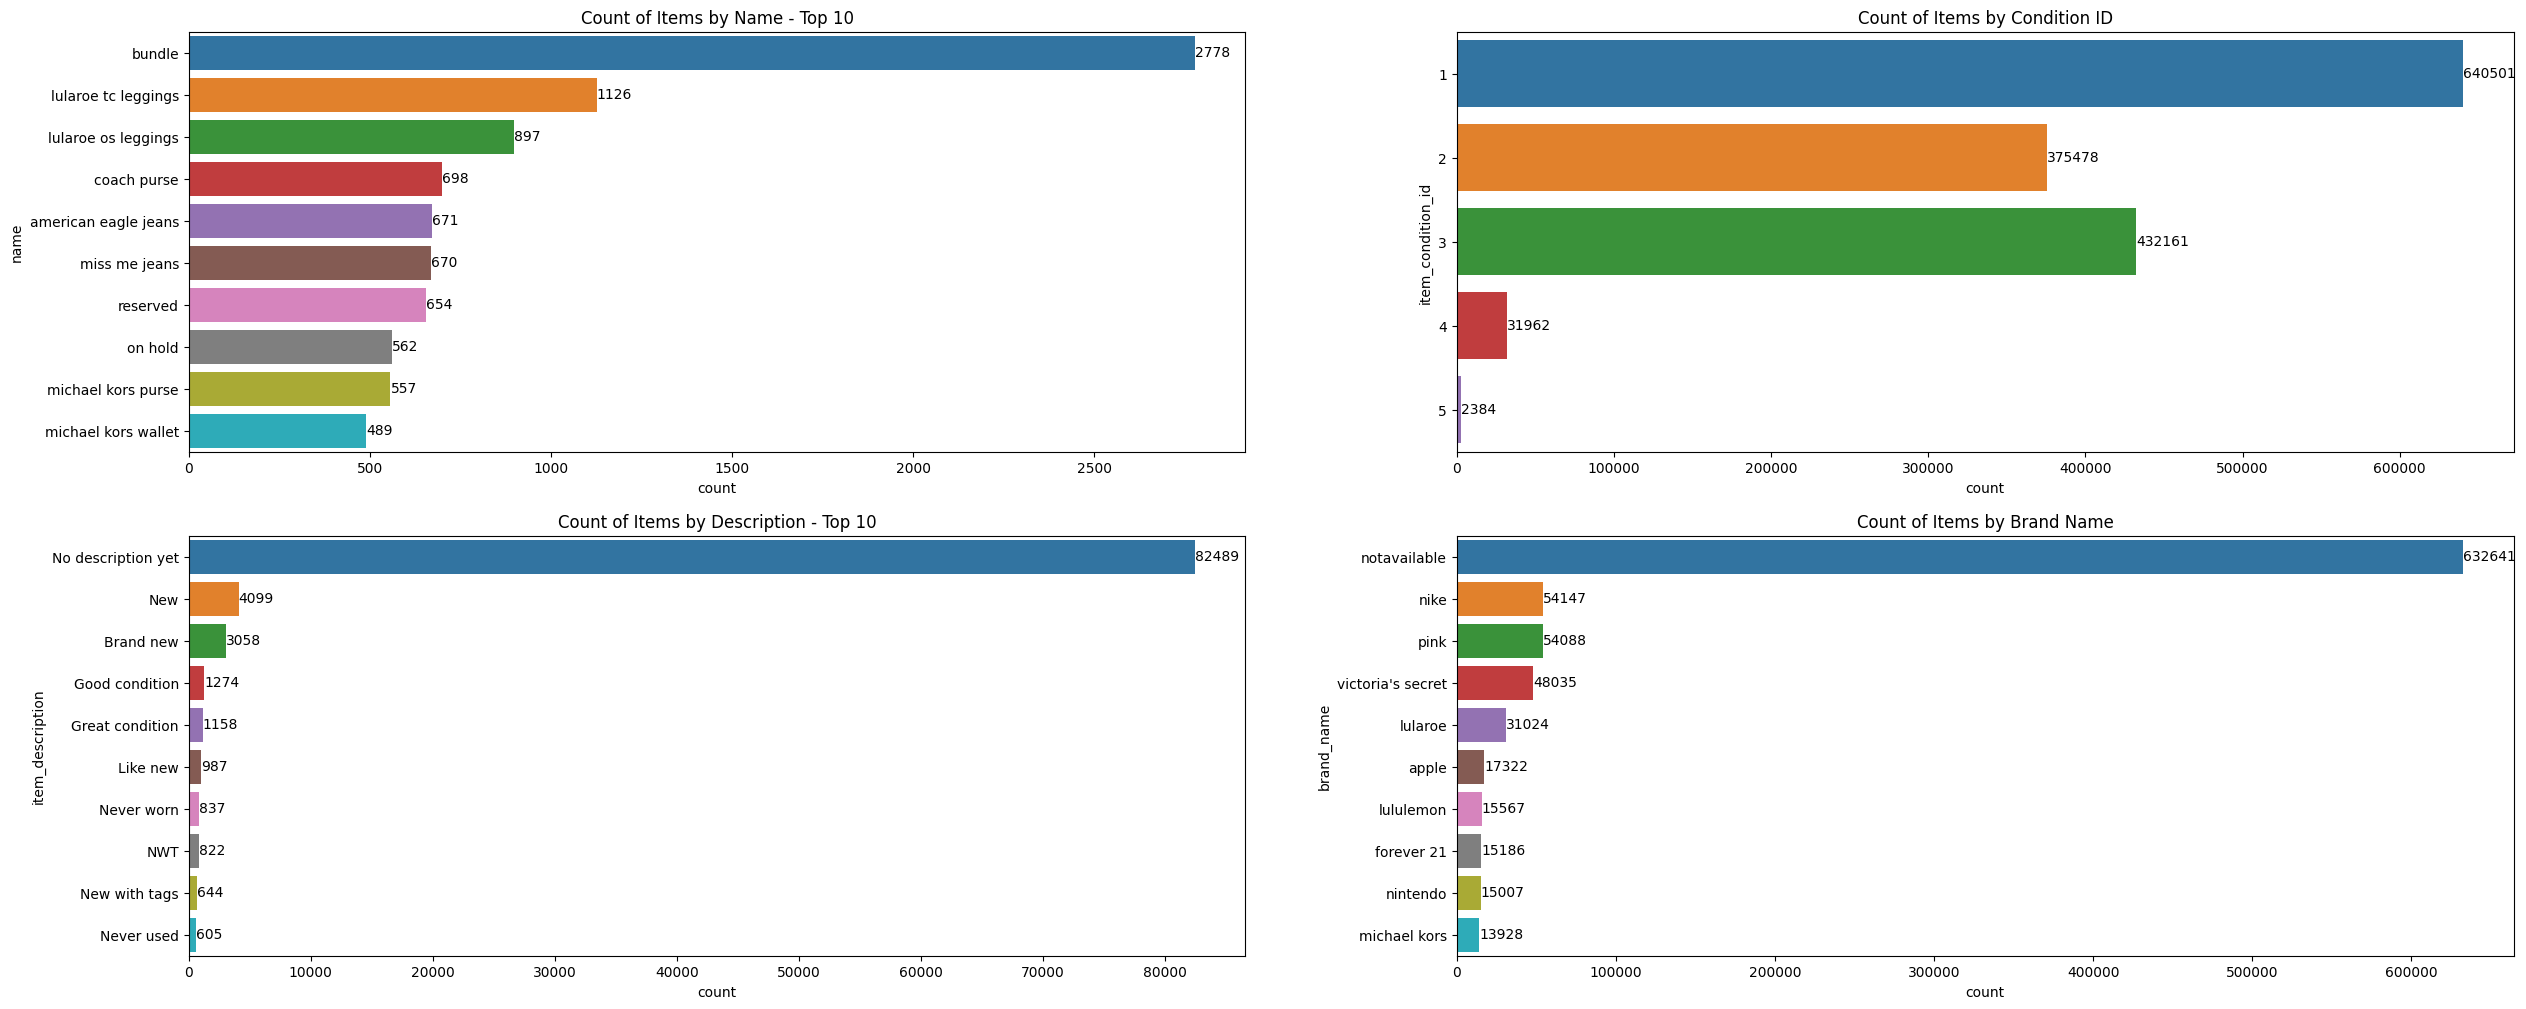

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(30,12))
sns.countplot(y='name', data=mercari_df, order = mercari_df['name'].value_counts().index[:10], ax=axes[0,0])
axes[0,0].bar_label(axes[0,0].containers[0])
axes[0,0].set_title('Count of Items by Name - Top 10')
sns.countplot(y='item_condition_id', data=mercari_df, ax=axes[0,1])
axes[0,1].bar_label(axes[0,1].containers[0])
axes[0,1].set_title('Count of Items by Condition ID')
sns.countplot(y='item_description', data=mercari_df, order = mercari_df['item_description'].value_counts().index[:10], ax=axes[1,0])
axes[1,0].bar_label(axes[1,0].containers[0])
axes[1,0].set_title('Count of Items by Description - Top 10')
sns.countplot(y='brand_name', data=mercari_df, order = mercari_df['brand_name'].value_counts().index[:10], ax=axes[1,1])
axes[1,1].bar_label(axes[1,1].containers[0])
axes[1,1].set_title('Count of Items by Brand Name')
plt.show()

**Insights:**

    - Most commonly occuring Items sold on Mercari are apparels and merchandize like - wallets, leggings,
    purse, jeans etc.

    - 640501 or 43% of the items have condition id as 1, 375478 or 25% of the items have condition id as 2
    and 432161 or 29% of the items have condition id as 3, rest of the 3% of the items have condition id
    as 4 and 5.

    - As per Description, most of the commonly occuring items on Mercari are in good condition or brand new
    or never worn or never used.

    - Most famous Brand of items available on Mercari are Nike, Victoria's Secret, Apple etc.

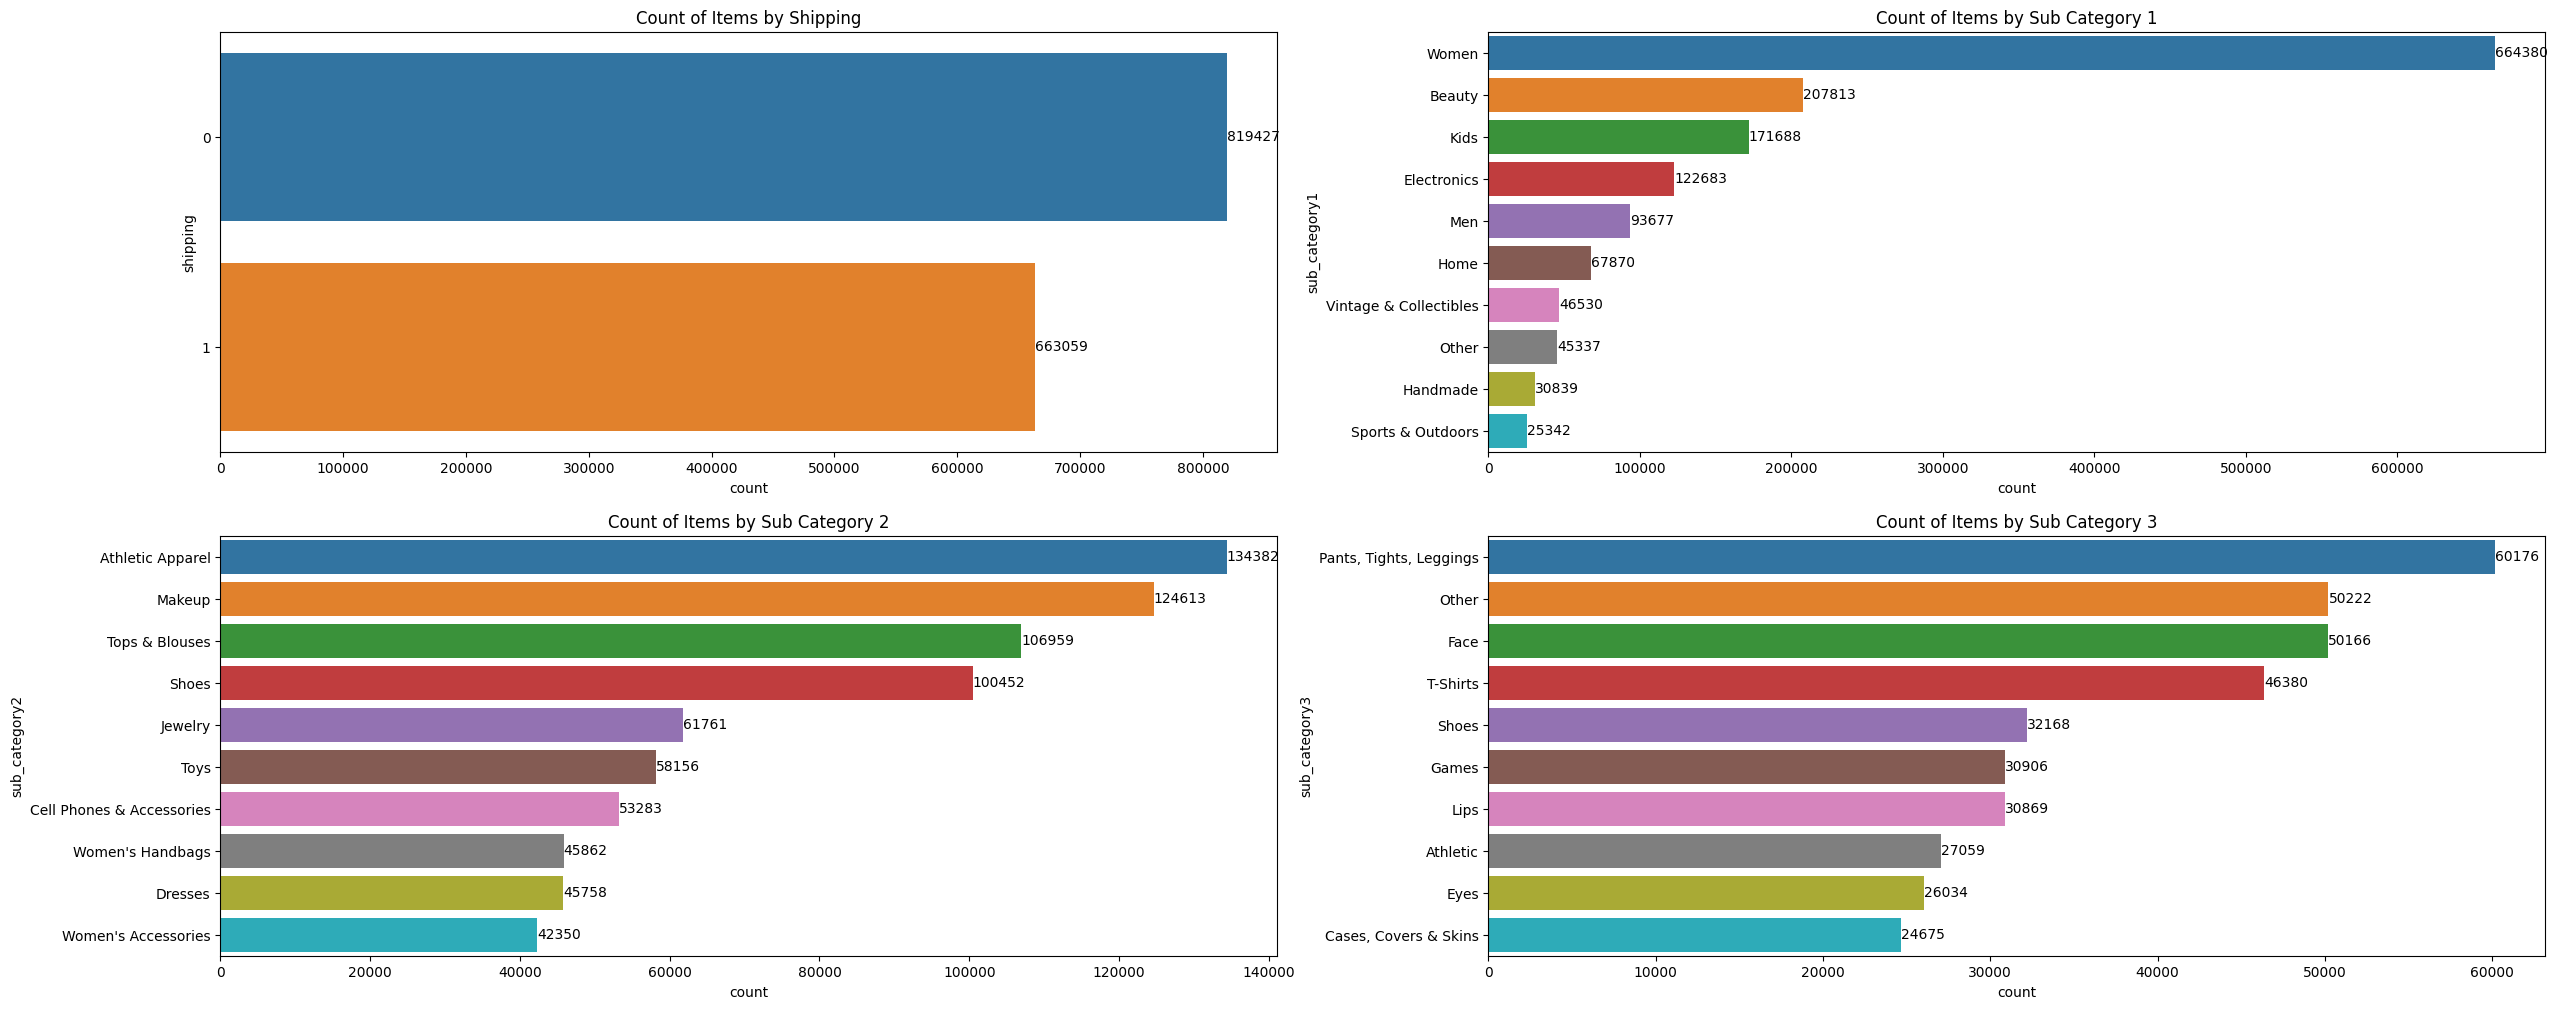

In [ ]:
fig,axes=plt.subplots(2,2,figsize=(30,12))
sns.countplot(y='shipping', data=mercari_df, ax=axes[0,0])
axes[0,0].bar_label(axes[0,0].containers[0])
axes[0,0].set_title('Count of Items by Shipping')
sns.countplot(y='sub_category1', data=mercari_df, order = mercari_df['sub_category1'].value_counts().index[:10], ax=axes[0,1])
axes[0,1].bar_label(axes[0,1].containers[0])
axes[0,1].set_title('Count of Items by Sub Category 1')
sns.countplot(y='sub_category2', data=mercari_df, order = mercari_df['sub_category2'].value_counts().index[:10], ax=axes[1,0])
axes[1,0].bar_label(axes[1,0].containers[0])
axes[1,0].set_title('Count of Items by Sub Category 2')
sns.countplot(y='sub_category3', data=mercari_df, order = mercari_df['sub_category3'].value_counts().index[:10], ax=axes[1,1])
axes[1,1].bar_label(axes[1,1].containers[0])
axes[1,1].set_title('Count of Items by Sub Category 3')
#plt.xticks(rotation = 75)
plt.show()

**Insights:**

    - 663059 or 45% of the items sold on Mercari are shipped by sellers. So, in majority (819427 or 55%)
    of the cases the customer is paying for the shipping.

    - Most of the Products sold on Mercari are for Women, Beauty-Care or Kids, closely followed by
    Electronic Items, products for Men or Home Products.

###***B. Numerical Columns***

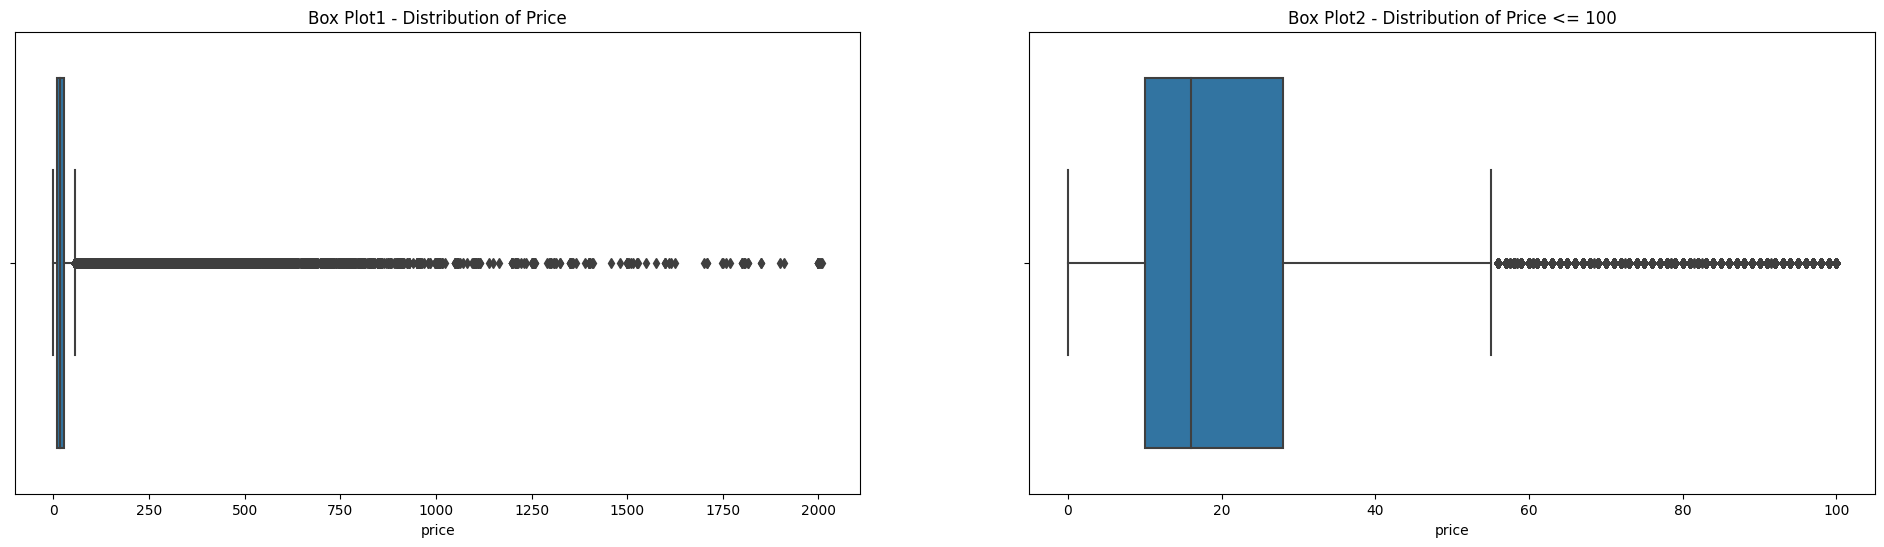

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(24,6))

sns.boxplot(data=mercari_df, x = 'price', ax=axes[0])
axes[0].set_title('Box Plot1 - Distribution of Price')

sns.boxplot(data=mercari_df[mercari_df['price'] <= 100], x="price", ax = axes[1])
axes[1].set_title('Box Plot2 - Distribution of Price <= 100')

plt.show()

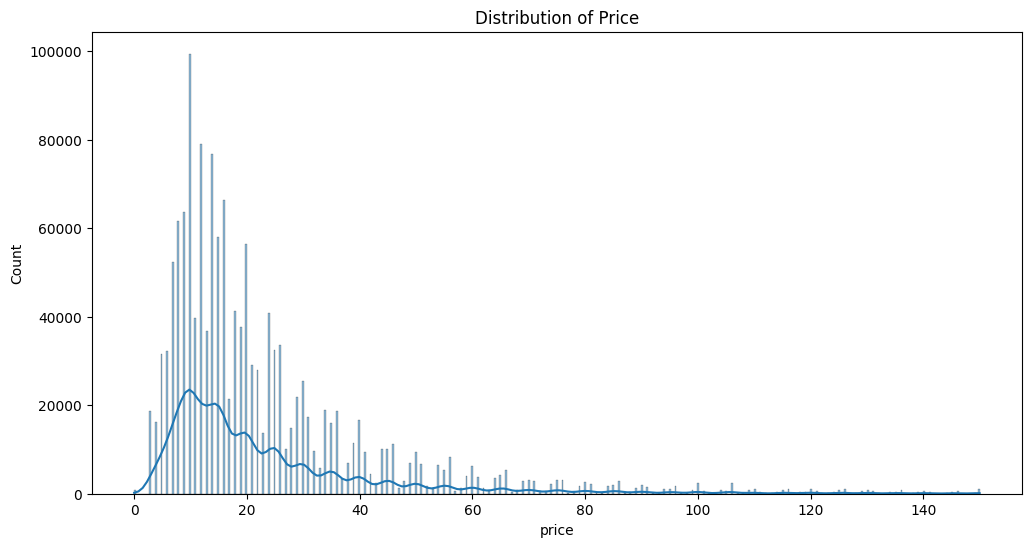

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.histplot(data=mercari_df[mercari_df['price'] <= 150], x="price", kde=True)
ax.bar_label(ax.containers[0])
plt.title('Distribution of Price')
plt.show()

**Insights:**

    - There is a huge amount of outliers in the dataset when we speak of price points

    - As is evident, from the distribution aove that items priced above 57.5 are outliers.

    - So, we will have to perform price point analysis for different brackets to have better
    understanding of items sold on Mercari.

In [ ]:
print(f"{len(mercari_df[mercari_df['price'] <= 57.5])} or {round(len(mercari_df[mercari_df['price'] <= 57.5])/len(mercari_df) * 100, 2)} \
percentage of items sold on mercari are priced lesser than 57.5")
print(f"{len(mercari_df[(mercari_df['price'] > 57.5) & (mercari_df['price'] <= 100)])} or \
{round(len(mercari_df[(mercari_df['price'] > 57.5) & (mercari_df['price'] <= 100)])/len(mercari_df) * 100, 2)} percentage of items sold on mercari are priced between 57.5 & 100")
print(f"{len(mercari_df[mercari_df['price'] > 100])} or {round(len(mercari_df[mercari_df['price'] > 100])/len(mercari_df) * 100, 2)} \
percentage of items sold on mercari are priced greater than 100")

1363134 or 91.95 percentage of items sold on mercari are priced lesser than 57.5
77460 or 5.23 percentage of items sold on mercari are priced between 57.5 & 100
41892 or 2.83 percentage of items sold on mercari are priced greater than 100


# **5. Bivariate Analysis**

### ***A. Price Analysis of Top 10 Products***

**I. Price Analysis of Top 10 Products with Price <= $57.5**

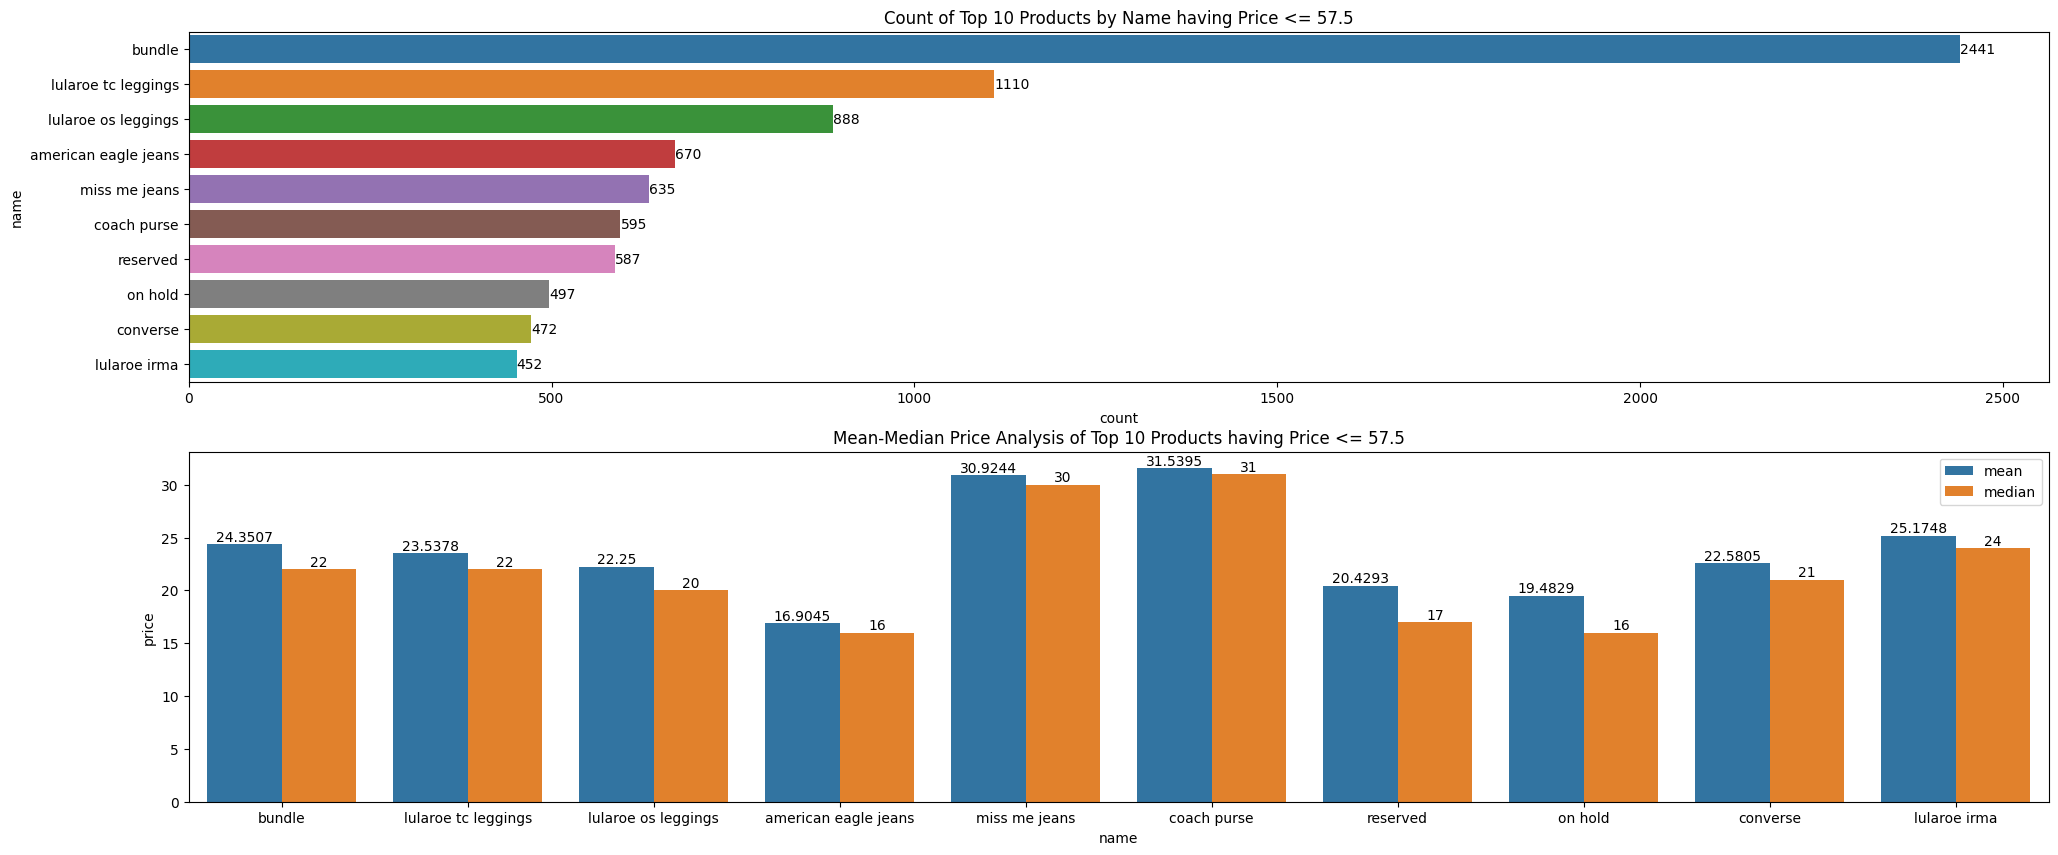

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(24,10))
price_less_than_t = mercari_df[mercari_df['price'] <= 57.5]
sns.countplot(y='name', data=price_less_than_t, order = price_less_than_t['name'].value_counts().index[:10], ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('Count of Top 10 Products by Name having Price <= $57.5')
products = price_less_than_t["name"].value_counts().index[:10]
df_products1 = price_less_than_t[price_less_than_t['name'].isin(products)].groupby(['name']).agg({'price':'mean'}).reset_index()
df_products1['type'] = 'mean'
df_products2 = price_less_than_t[price_less_than_t['name'].isin(products)].groupby(['name']).agg({'price':'median'}).reset_index()
df_products2['type'] = 'median'
df_products = pd.concat([df_products1, df_products2]).reset_index(drop = True)
df_products
sns.barplot(data=df_products, x="name", y="price", order = price_less_than_t['name'].value_counts().index[:10], hue="type")
axes[1].bar_label(axes[1].containers[0])
axes[1].bar_label(axes[1].containers[1])
axes[1].set_title('Mean-Median Price Analysis of Top 10 Products having Price <= $57.5')
plt.legend()
plt.show()

**II. Price Analysis of Top 10 Products with Price between 57.5 & 100 dollars**

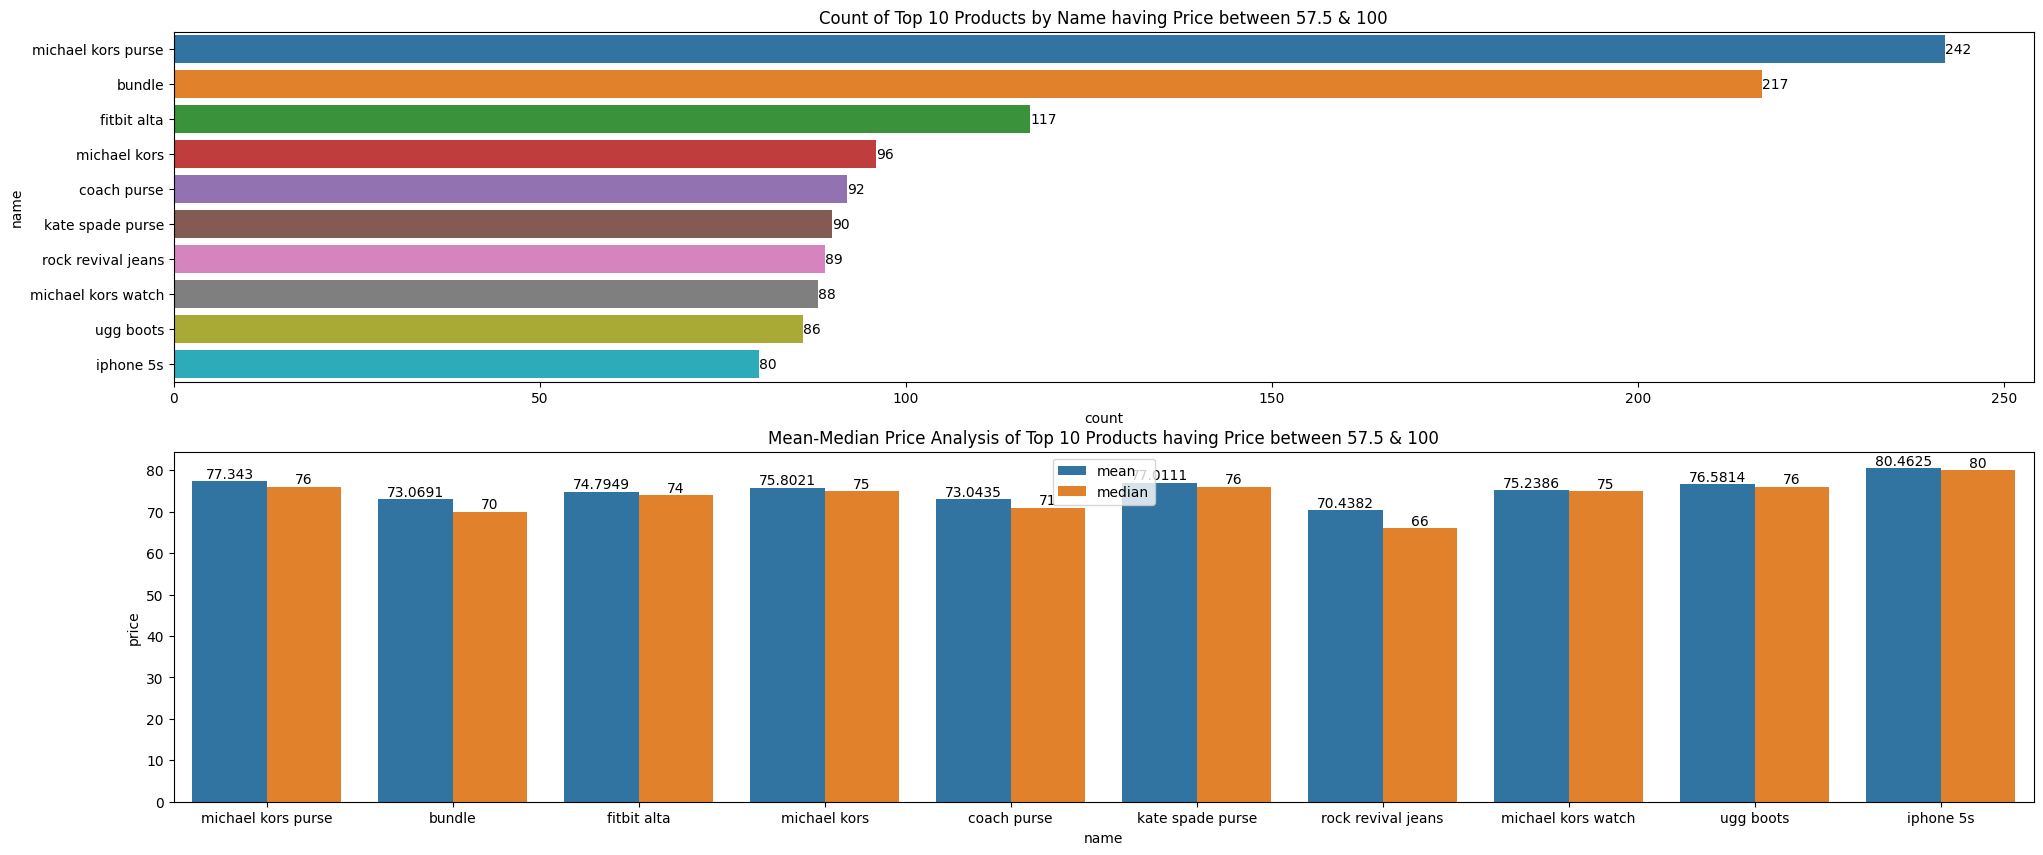

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(24,10))
price_greater_than_t = mercari_df[(mercari_df['price'] > 57.5) & (mercari_df['price'] <= 100)]
sns.countplot(y='name', data=price_greater_than_t, order = price_greater_than_t['name'].value_counts().index[:10], ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('Count of Top 10 Products by Name having Price between $57.5 & $100')
products = price_greater_than_t["name"].value_counts().index[:10]
df_products1 = price_greater_than_t[price_greater_than_t['name'].isin(products)].groupby(['name']).agg({'price':'mean'}).reset_index()
df_products1['type'] = 'mean'
df_products2 = price_greater_than_t[price_greater_than_t['name'].isin(products)].groupby(['name']).agg({'price':'median'}).reset_index()
df_products2['type'] = 'median'
df_products = pd.concat([df_products1, df_products2]).reset_index(drop = True)
df_products
sns.barplot(data=df_products, x="name", y="price", order = price_greater_than_t['name'].value_counts().index[:10], hue="type")
axes[1].bar_label(axes[1].containers[0])
axes[1].bar_label(axes[1].containers[1])
axes[1].set_title('Mean-Median Price Analysis of Top 10 Products having Price between $57.5 & $100')
plt.legend()
plt.show()

**III. Price Analysis of Top 10 Products with Price > $100**

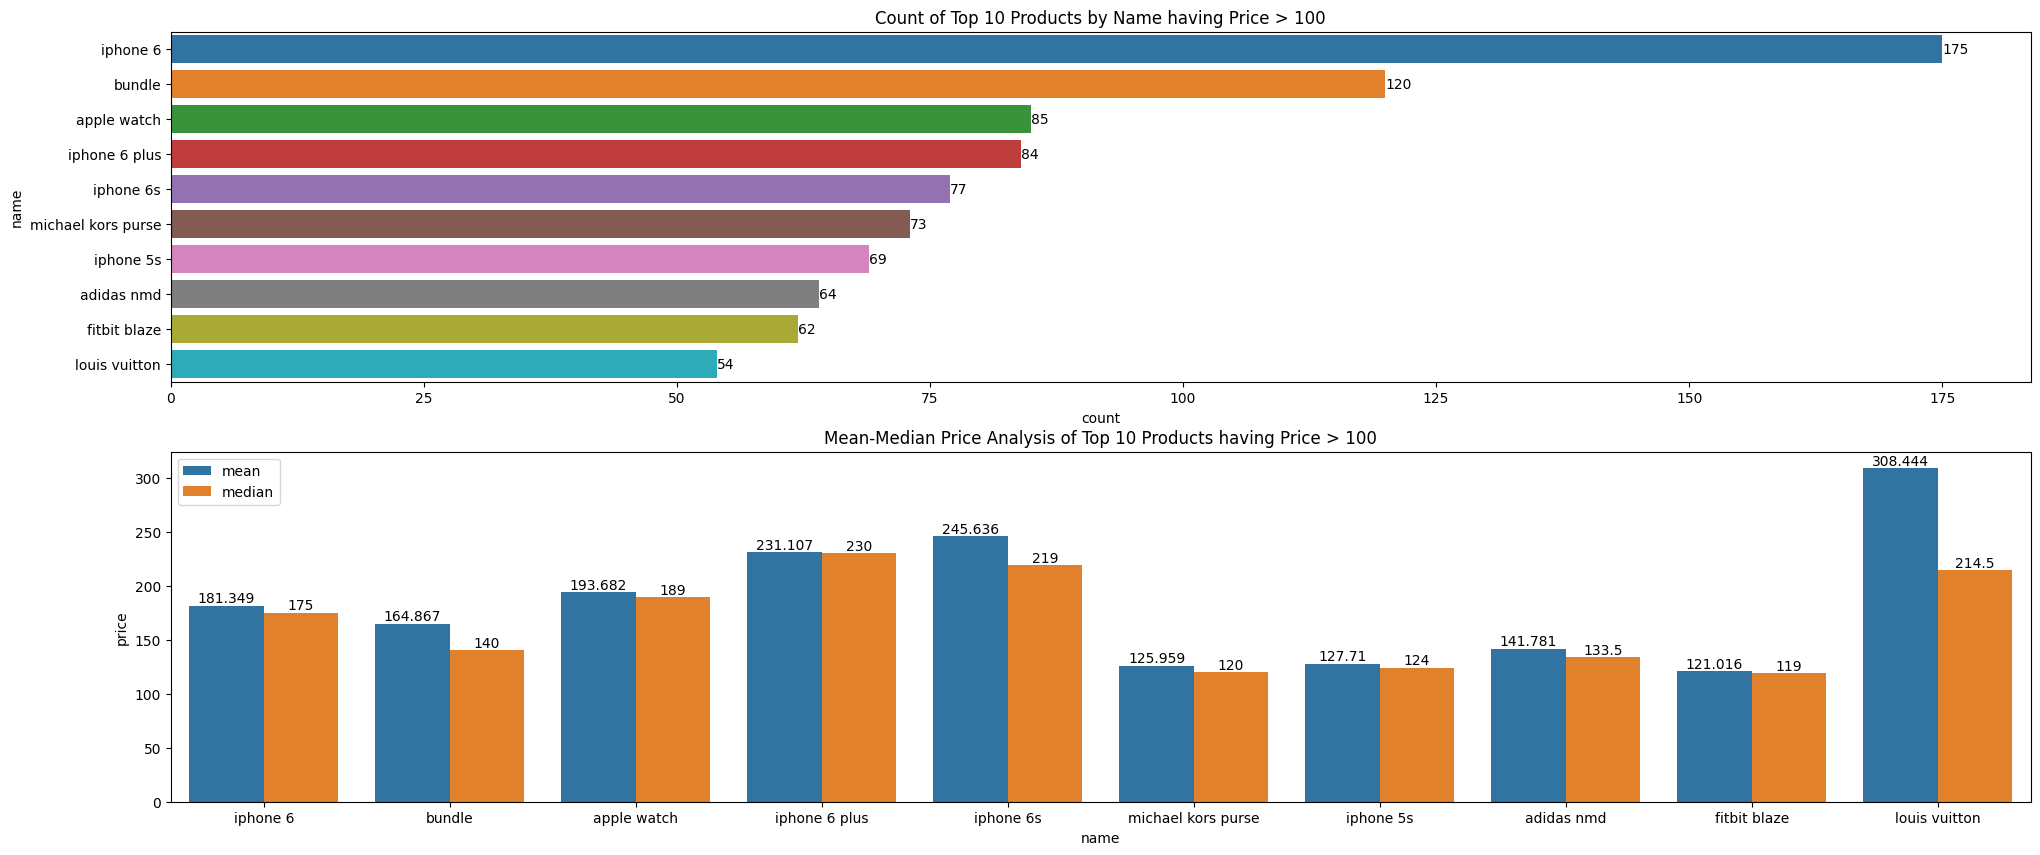

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(24,10))
price_greater_than_t = mercari_df[mercari_df['price'] > 100]
sns.countplot(y='name', data=price_greater_than_t, order = price_greater_than_t['name'].value_counts().index[:10], ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('Count of Top 10 Products by Name having Price > $100')
products = price_greater_than_t["name"].value_counts().index[:10]
df_products1 = price_greater_than_t[price_greater_than_t['name'].isin(products)].groupby(['name']).agg({'price':'mean'}).reset_index()
df_products1['type'] = 'mean'
df_products2 = price_greater_than_t[price_greater_than_t['name'].isin(products)].groupby(['name']).agg({'price':'median'}).reset_index()
df_products2['type'] = 'median'
df_products = pd.concat([df_products1, df_products2]).reset_index(drop = True)
df_products
sns.barplot(data=df_products, x="name", y="price", order = price_greater_than_t['name'].value_counts().index[:10], hue="type")
axes[1].bar_label(axes[1].containers[0])
axes[1].bar_label(axes[1].containers[1])
axes[1].set_title('Mean-Median Price Analysis of Top 10 Products having Price > $100')
plt.legend()
plt.show()

**Insights:**

    - Most of the items on Mercari in the price range of 0 to $57.5 are women apparels and accessories like
    leggings, jeans & purse.

    - When we consider the items in the price range of $57.5 to $100, most of the products on Mercari
    are a mixture of watches, phones and women apparels and accessories like jeans and purse.

    - For expensive or items priced above $100, products range from iphones to fitness gadgets to louis vuitton.

###***B. Price Analysis of Top 10 Brands***

**I. Price Analysis of Top 10 Brands with Price <= $57.5**

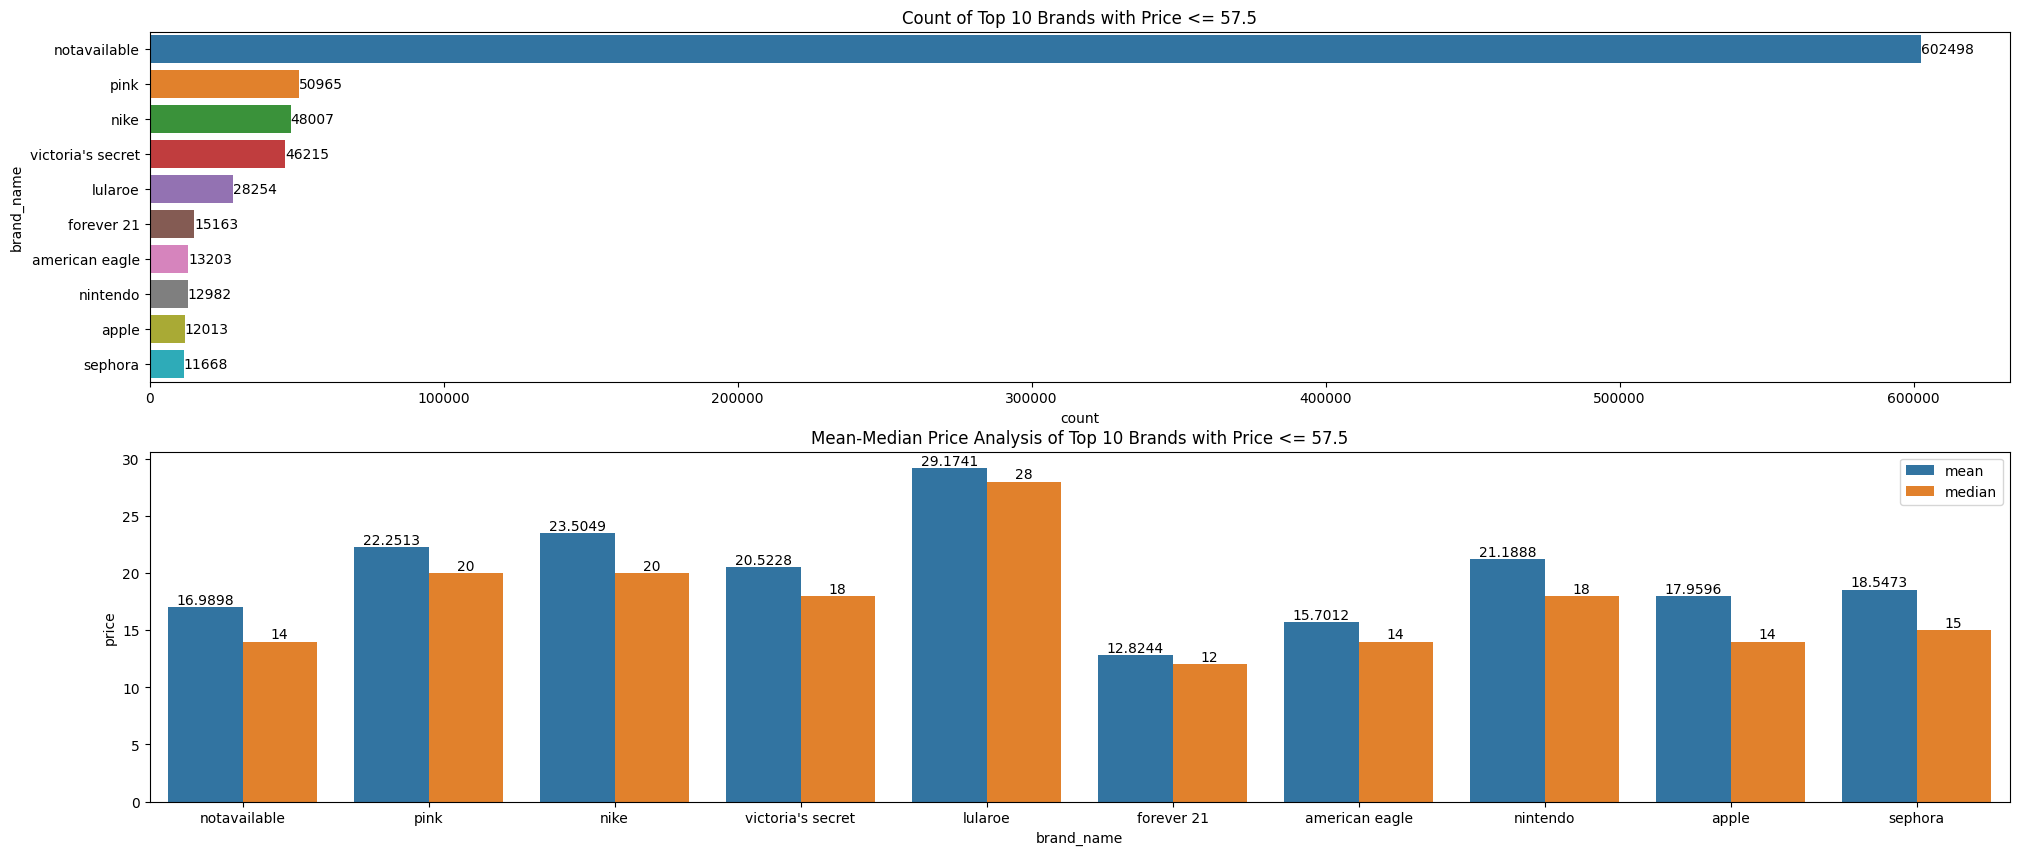

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(24,10))
price_less_than_t = mercari_df[mercari_df['price'] <= 57.5]
sns.countplot(y='brand_name', data=price_less_than_t, order = price_less_than_t['brand_name'].value_counts().index[:10], ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('Count of Top 10 Brands with Price <= $57.5')
products = price_less_than_t["brand_name"].value_counts().index[:10]
df_products1 = price_less_than_t[price_less_than_t['brand_name'].isin(products)].groupby(['brand_name']).agg({'price':'mean'}).reset_index()
df_products1['type'] = 'mean'
df_products2 = price_less_than_t[price_less_than_t['brand_name'].isin(products)].groupby(['brand_name']).agg({'price':'median'}).reset_index()
df_products2['type'] = 'median'
df_products = pd.concat([df_products1, df_products2]).reset_index(drop = True)
df_products
sns.barplot(data=df_products, x="brand_name", y="price", order = price_less_than_t['brand_name'].value_counts().index[:10], hue="type")
axes[1].bar_label(axes[1].containers[0])
axes[1].bar_label(axes[1].containers[1])
axes[1].set_title('Mean-Median Price Analysis of Top 10 Brands with Price <= $57.5')
plt.legend()
plt.show()

**II. Price Analysis of Top 10 Brands with Price between 57.5 & 100 dollars**

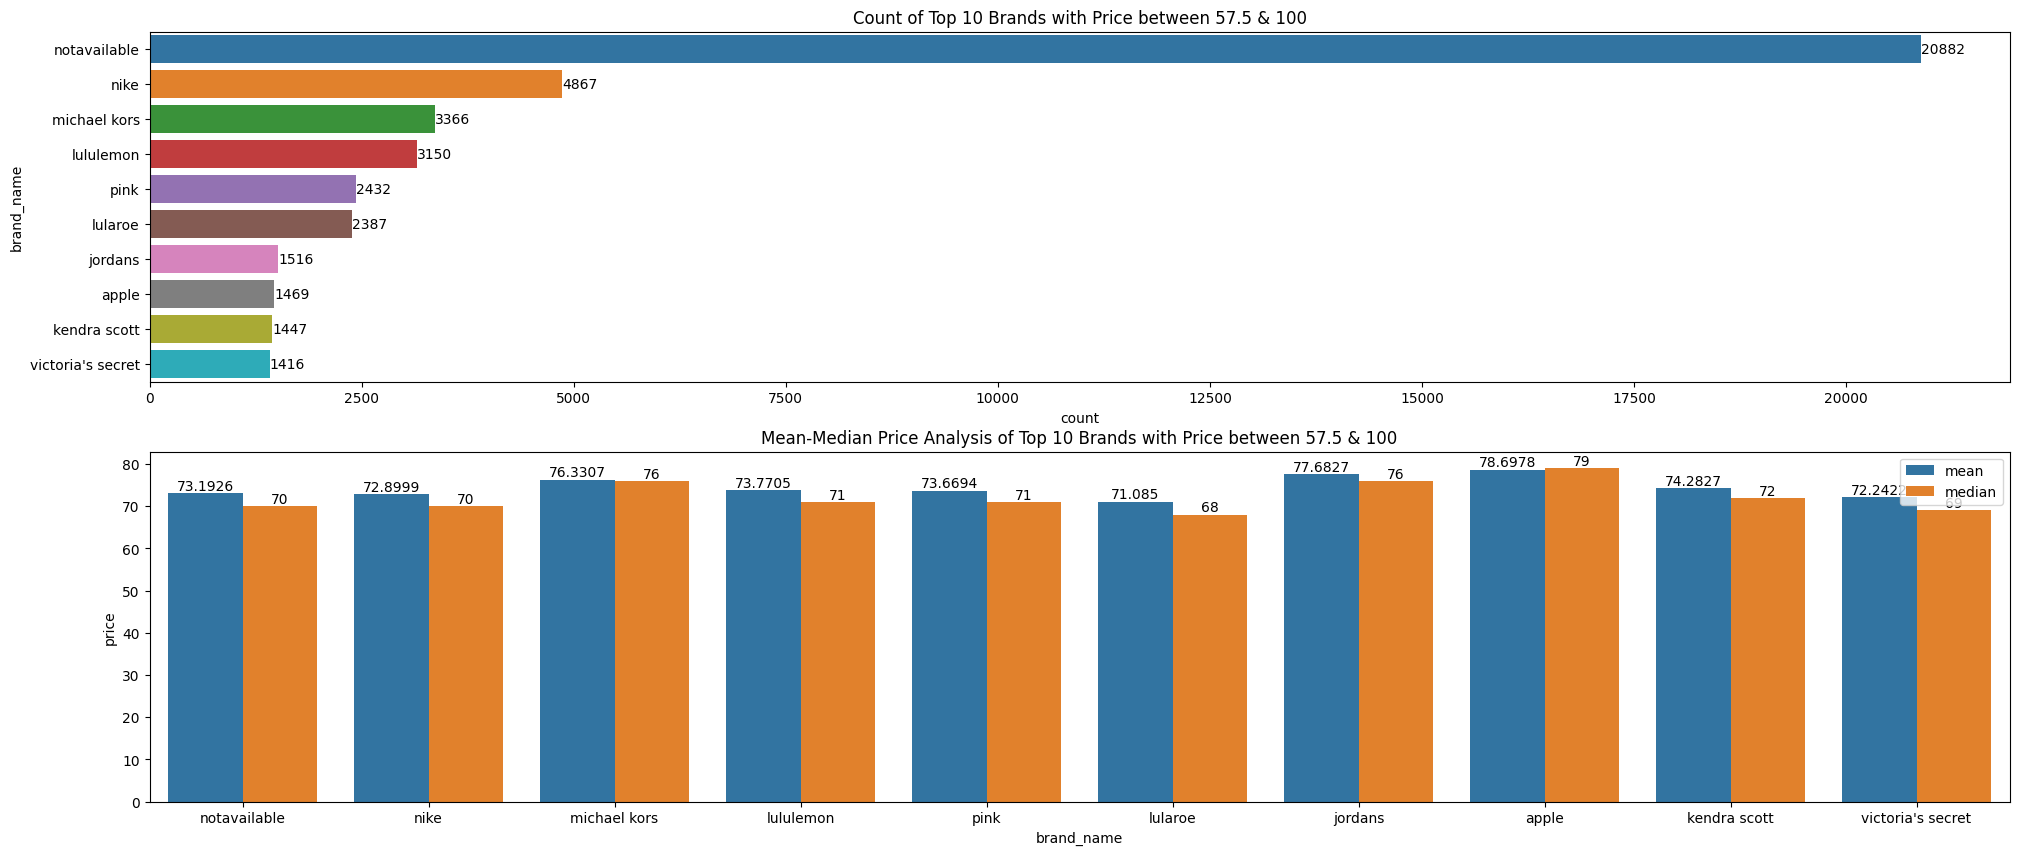

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(24,10))
price_greater_than_t = mercari_df[(mercari_df['price'] > 57.5) & (mercari_df['price'] <= 100)]
sns.countplot(y='brand_name', data=price_greater_than_t, order = price_greater_than_t['brand_name'].value_counts().index[:10], ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('Count of Top 10 Brands with Price between $57.5 & $100')
products = price_greater_than_t["brand_name"].value_counts().index[:10]
df_products1 = price_greater_than_t[price_greater_than_t['brand_name'].isin(products)].groupby(['brand_name']).agg({'price':'mean'}).reset_index()
df_products1['type'] = 'mean'
df_products2 = price_greater_than_t[price_greater_than_t['brand_name'].isin(products)].groupby(['brand_name']).agg({'price':'median'}).reset_index()
df_products2['type'] = 'median'
df_products = pd.concat([df_products1, df_products2]).reset_index(drop = True)
df_products
sns.barplot(data=df_products, x="brand_name", y="price", order = price_greater_than_t['brand_name'].value_counts().index[:10], hue="type")
axes[1].bar_label(axes[1].containers[0])
axes[1].bar_label(axes[1].containers[1])
axes[1].set_title('Mean-Median Price Analysis of Top 10 Brands with Price between $57.5 & $100')
plt.legend()
plt.show()

**III. Price Analysis of Top 10 Brands with Price > $100**

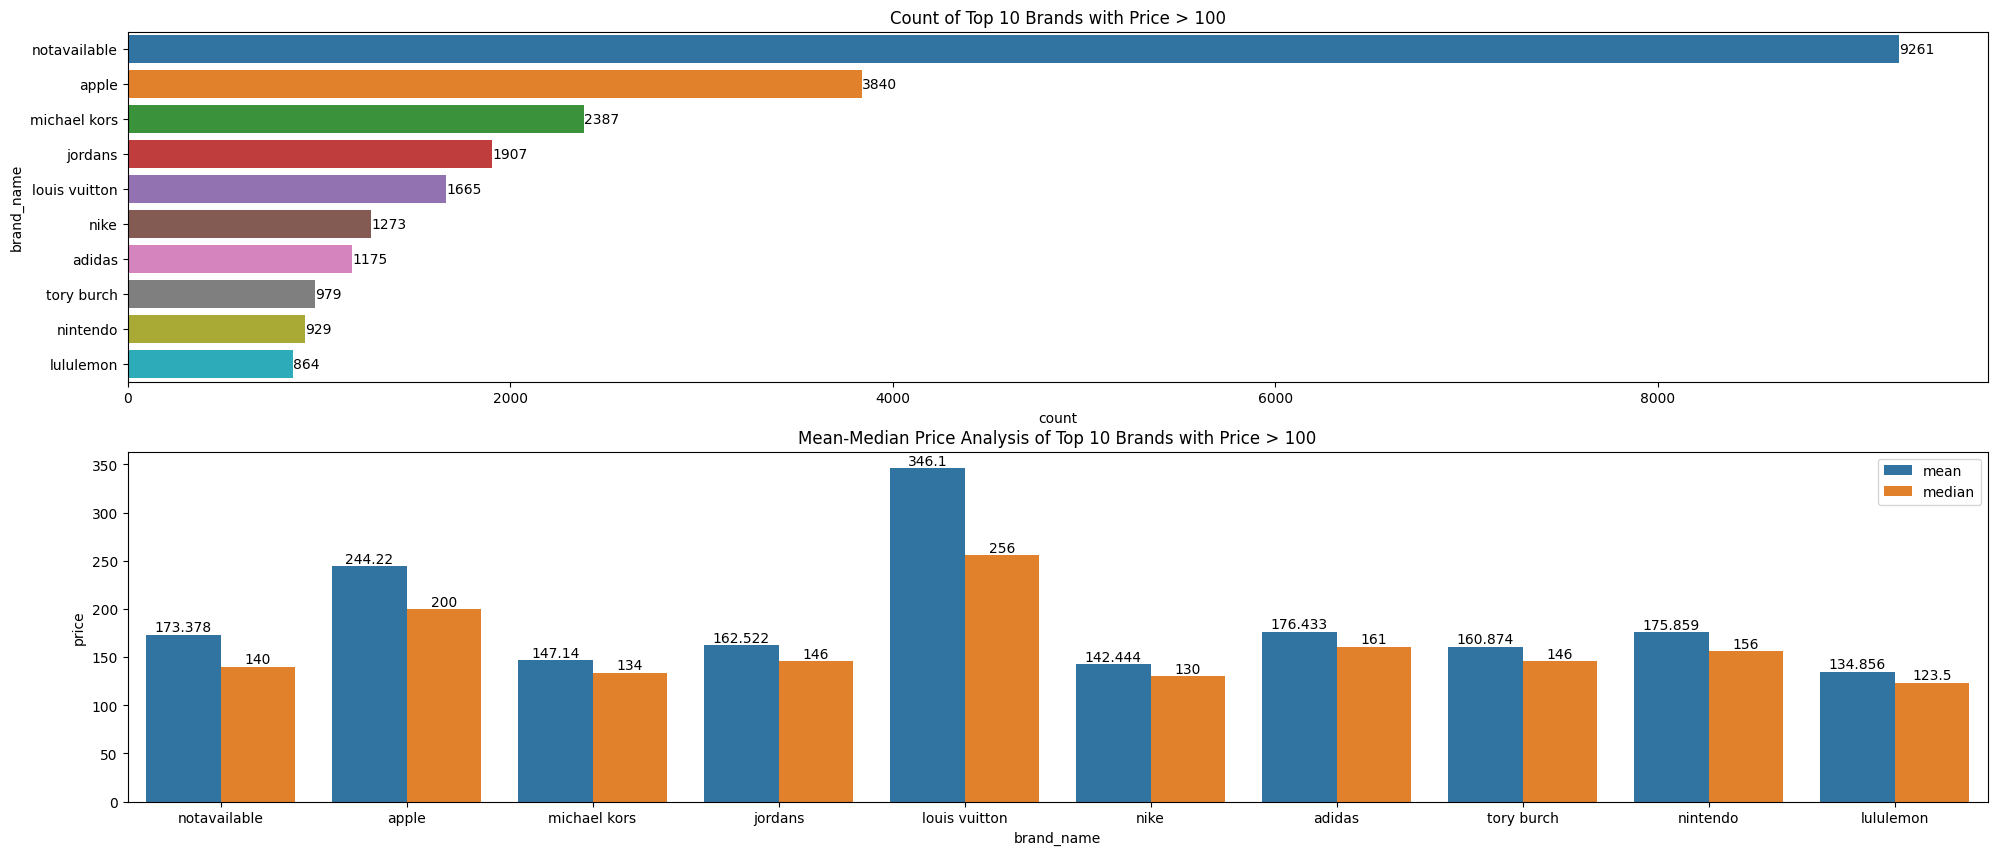

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(24,10))
price_greater_than_t = mercari_df[mercari_df['price'] > 100]
sns.countplot(y='brand_name', data=price_greater_than_t, order = price_greater_than_t['brand_name'].value_counts().index[:10], ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('Count of Top 10 Brands with Price > $100')
products = price_greater_than_t["brand_name"].value_counts().index[:10]
df_products1 = price_greater_than_t[price_greater_than_t['brand_name'].isin(products)].groupby(['brand_name']).agg({'price':'mean'}).reset_index()
df_products1['type'] = 'mean'
df_products2 = price_greater_than_t[price_greater_than_t['brand_name'].isin(products)].groupby(['brand_name']).agg({'price':'median'}).reset_index()
df_products2['type'] = 'median'
df_products = pd.concat([df_products1, df_products2]).reset_index(drop = True)
df_products
sns.barplot(data=df_products, x="brand_name", y="price", order = price_greater_than_t['brand_name'].value_counts().index[:10], hue="type")
axes[1].bar_label(axes[1].containers[0])
axes[1].bar_label(axes[1].containers[1])
axes[1].set_title('Mean-Median Price Analysis of Top 10 Brands with Price > $100')
plt.legend()
plt.show()

**Insights:**

    - Most of the items on Mercari in the price range of 0 to $100, belong to brands like Nike, Nintendo,
    Lularoe, Victoria's Secrets, Michael Kors etc.

    - For expensive or items priced above $100, brands are Apple, Michael Kors, Jordans, Louis Vuitton,
    Nike, Addidas etc.

###***C. Price Analysis of Products by Condition ID***

**I. Price Analysis of Products by Condition ID with Price <= $57.5**

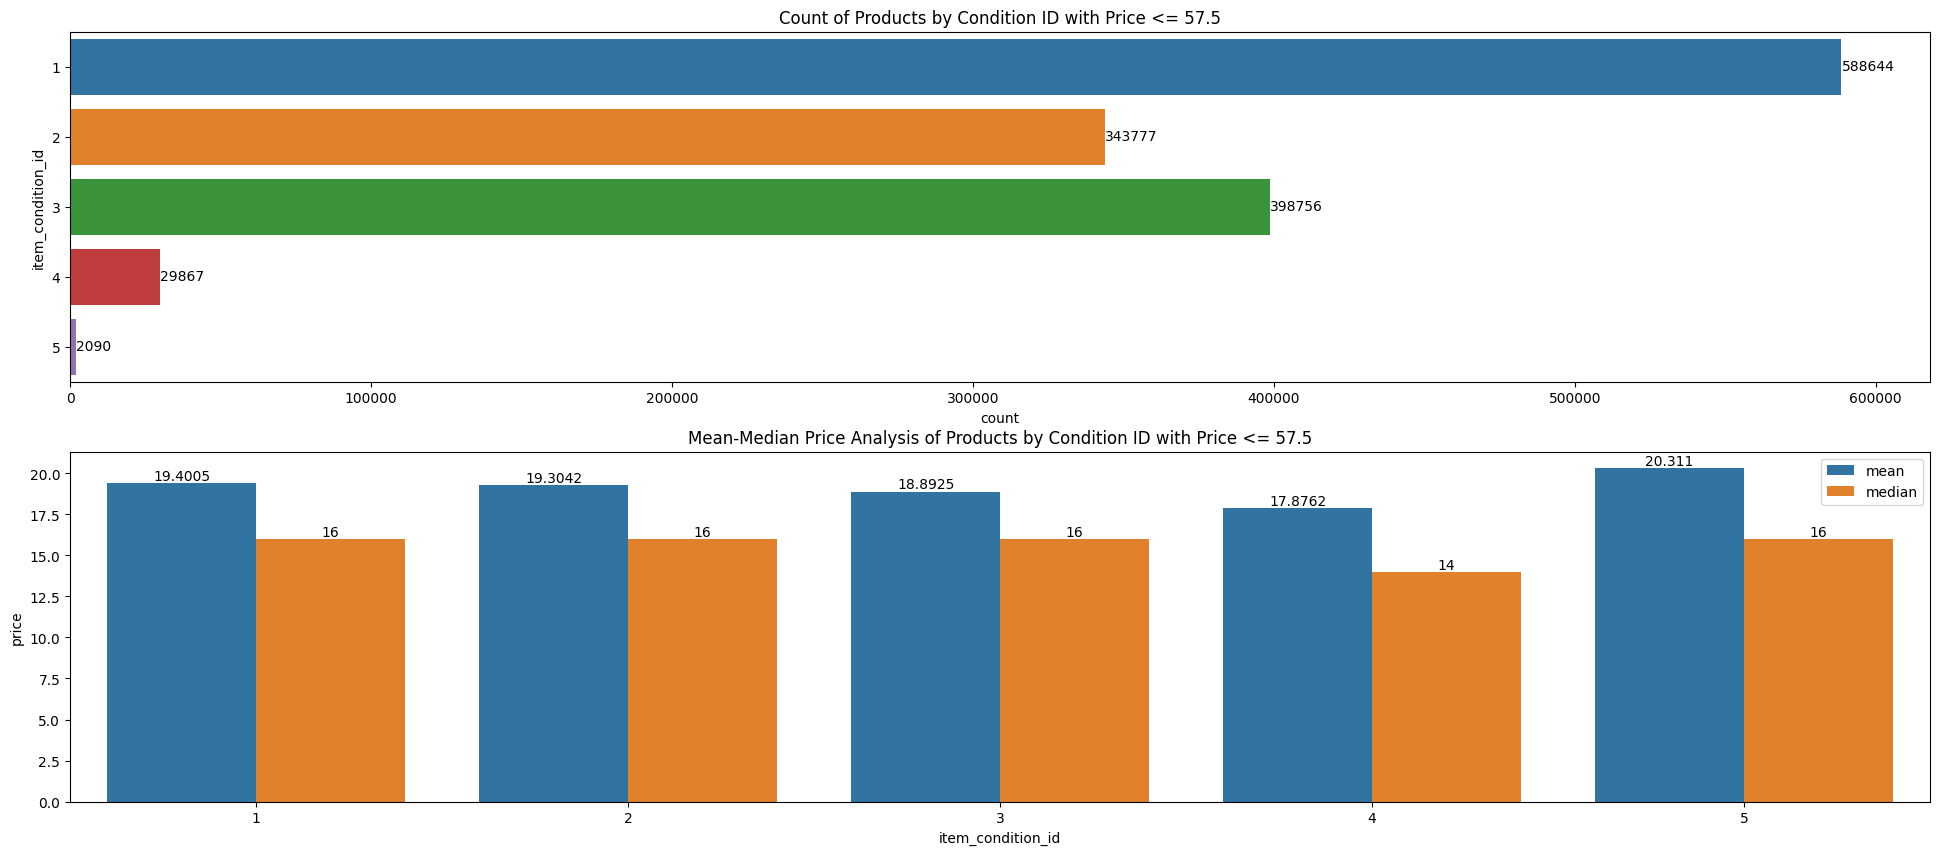

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(24,10))
price_less_than_t = mercari_df[mercari_df['price'] <= 57.5]
sns.countplot(y='item_condition_id', data=price_less_than_t, ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('Count of Products by Condition ID with Price <= $57.5')
df_condition1 = price_less_than_t.groupby(['item_condition_id']).agg({'price':'mean'}).reset_index()
df_condition1['type'] = 'mean'
df_condition2 = price_less_than_t.groupby(['item_condition_id']).agg({'price':'median'}).reset_index()
df_condition2['type'] = 'median'
df_condition = pd.concat([df_condition1, df_condition2]).reset_index(drop = True)
df_condition
sns.barplot(data=df_condition, x="item_condition_id", y="price", hue="type")
axes[1].bar_label(axes[1].containers[0])
axes[1].bar_label(axes[1].containers[1])
axes[1].set_title('Mean-Median Price Analysis of Products by Condition ID with Price <= $57.5')
plt.legend()
plt.show()

**II. Price Analysis of Products by Condition ID with Price between 57.5 & 100 dollars**

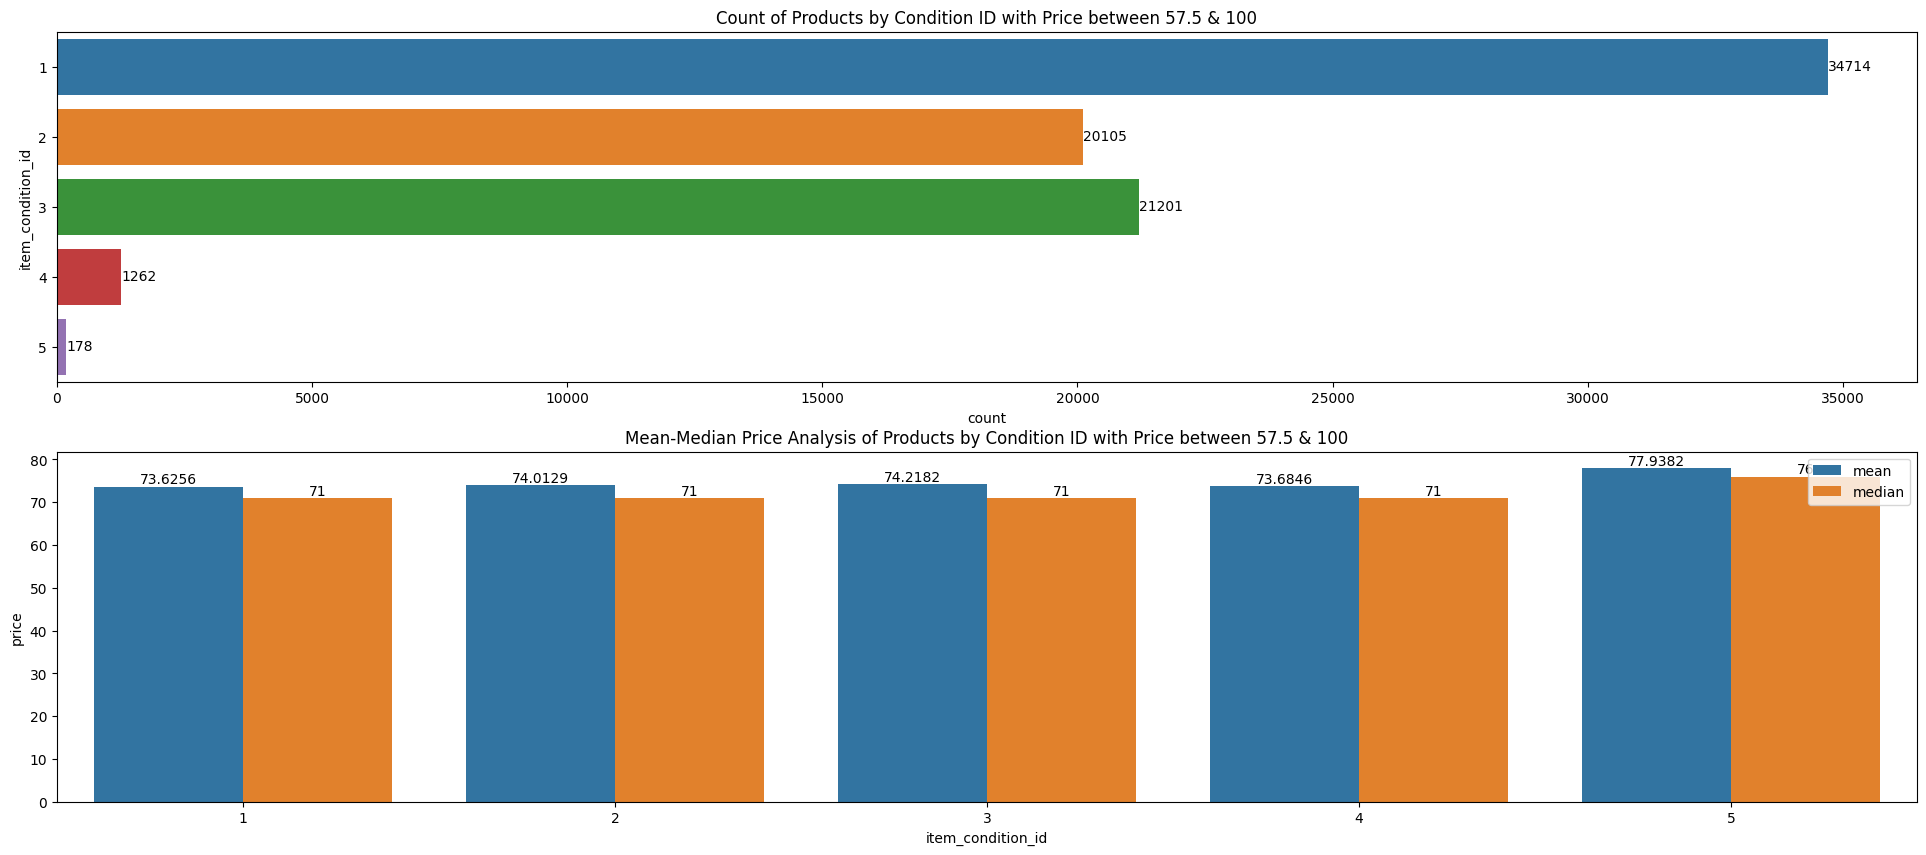

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(24,10))
price_greater_than_t = mercari_df[(mercari_df['price'] > 57.5) & (mercari_df['price'] <= 100)]
sns.countplot(y='item_condition_id', data=price_greater_than_t, ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('Count of Products by Condition ID with Price between $57.5 & $100')
df_condition1 = price_greater_than_t.groupby(['item_condition_id']).agg({'price':'mean'}).reset_index()
df_condition1['type'] = 'mean'
df_condition2 = price_greater_than_t.groupby(['item_condition_id']).agg({'price':'median'}).reset_index()
df_condition2['type'] = 'median'
df_condition = pd.concat([df_condition1, df_condition2]).reset_index(drop = True)
df_condition
sns.barplot(data=df_condition, x="item_condition_id", y="price", hue="type")
axes[1].bar_label(axes[1].containers[0])
axes[1].bar_label(axes[1].containers[1])
axes[1].set_title('Mean-Median Price Analysis of Products by Condition ID with Price between $57.5 & $100')
plt.legend()
plt.show()

**III. Price Analysis of Products by Condition ID with Price > $100**

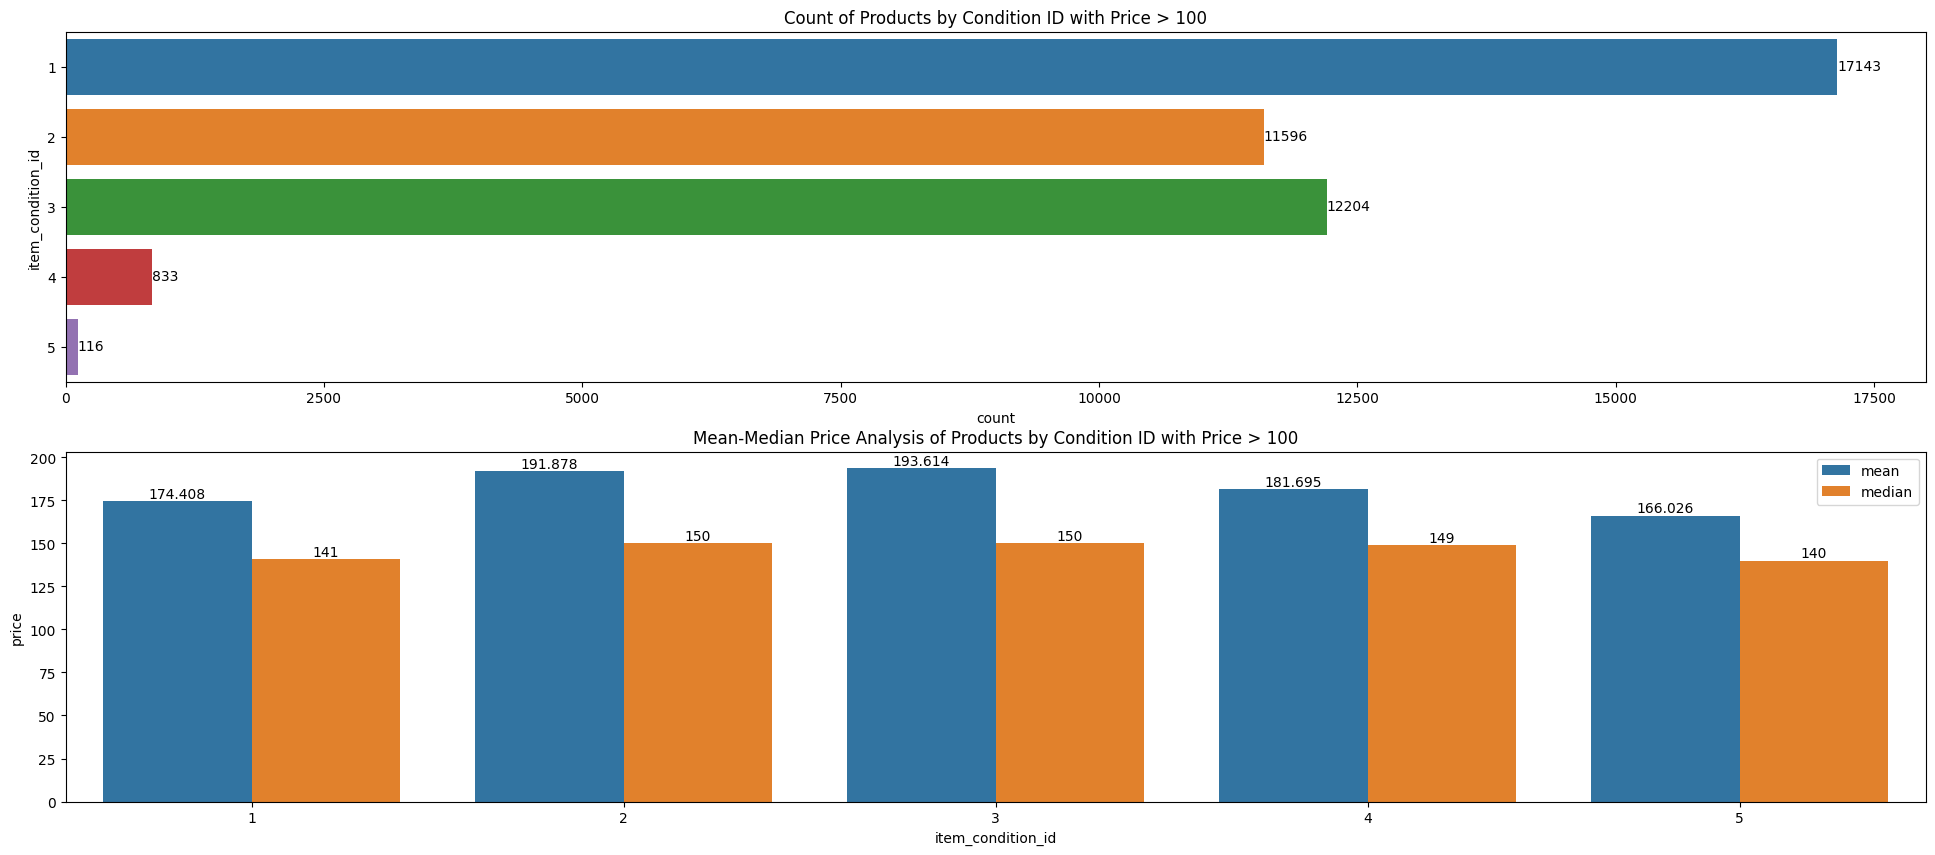

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(24,10))
price_greater_than_t = mercari_df[mercari_df['price'] > 100]
sns.countplot(y='item_condition_id', data=price_greater_than_t, ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('Count of Products by Condition ID with Price > $100')
df_condition1 = price_greater_than_t.groupby(['item_condition_id']).agg({'price':'mean'}).reset_index()
df_condition1['type'] = 'mean'
df_condition2 = price_greater_than_t.groupby(['item_condition_id']).agg({'price':'median'}).reset_index()
df_condition2['type'] = 'median'
df_condition = pd.concat([df_condition1, df_condition2]).reset_index(drop = True)
df_condition
sns.barplot(data=df_condition, x="item_condition_id", y="price", hue="type")
axes[1].bar_label(axes[1].containers[0])
axes[1].bar_label(axes[1].containers[1])
axes[1].set_title('Mean-Median Price Analysis of Products by Condition ID with Price > $100')
plt.legend()
plt.show()

**Insights:**

    - Irrespective of the price range, 95% to 97% of the items are in the condition id of 1 to 3.

### ***D. Price Analysis of Products by Shipping***

**I. Price Analysis of Products by Shipping with Price <= $57.5**

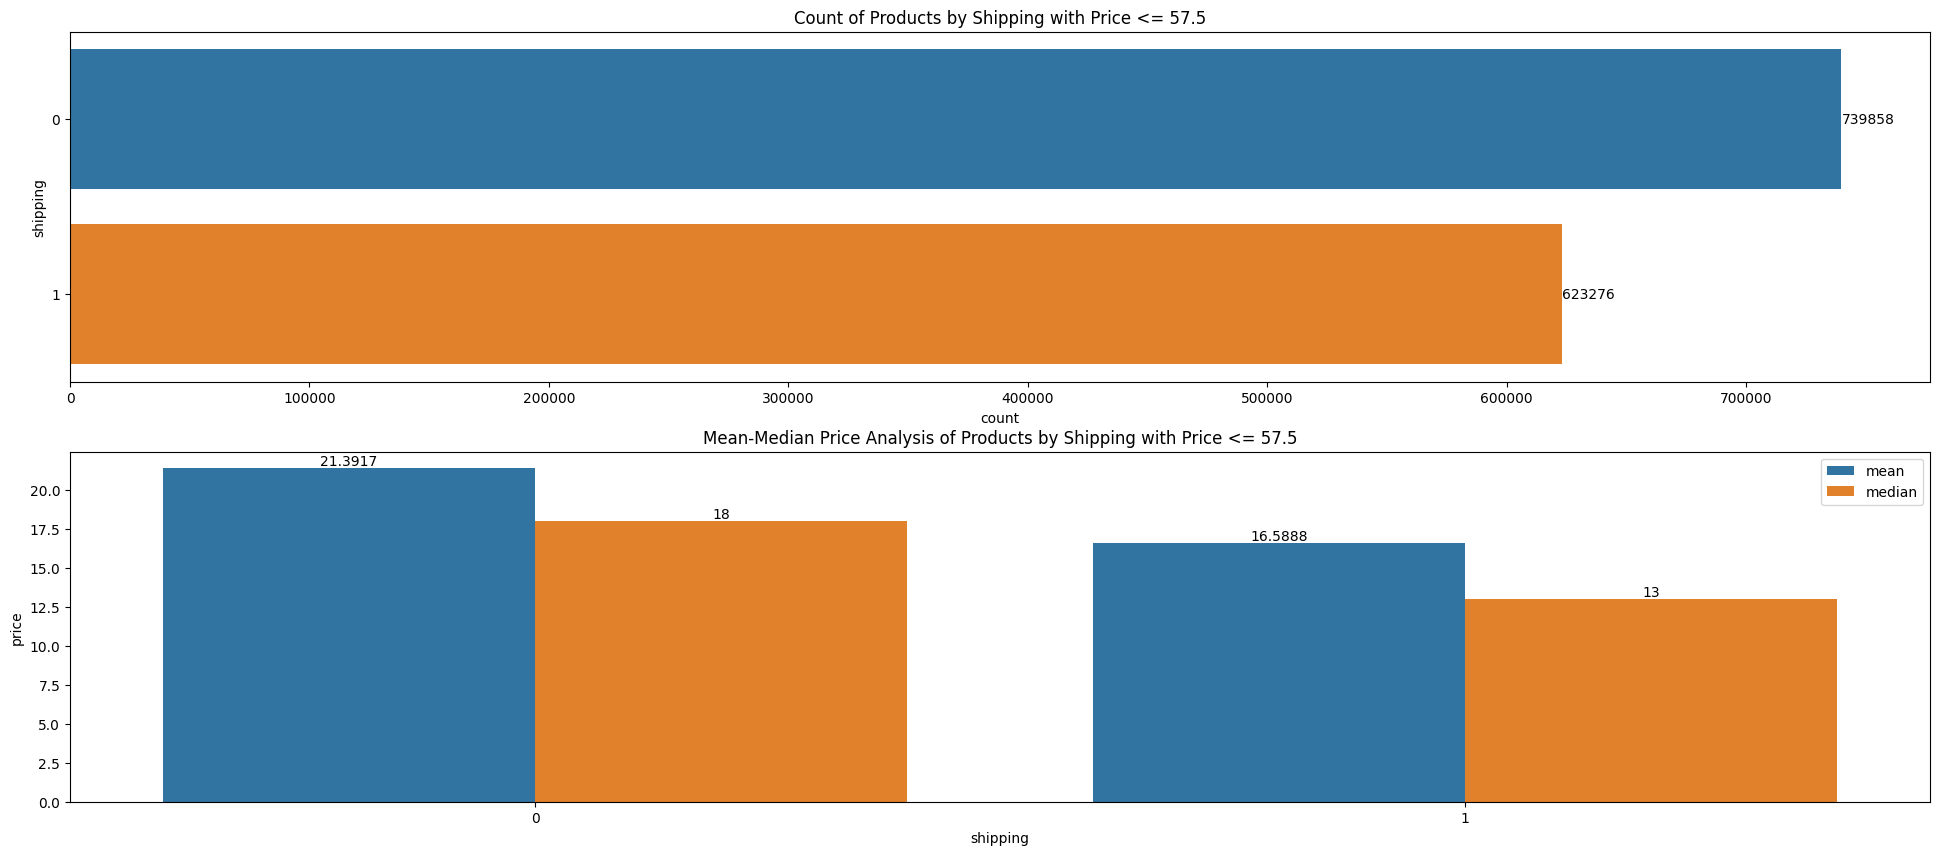

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(24,10))
price_less_than_t = mercari_df[mercari_df['price'] <= 57.5]
sns.countplot(y='shipping', data=price_less_than_t, ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('Count of Products by Shipping with Price <= $57.5')
df_condition1 = price_less_than_t.groupby(['shipping']).agg({'price':'mean'}).reset_index()
df_condition1['type'] = 'mean'
df_condition2 = price_less_than_t.groupby(['shipping']).agg({'price':'median'}).reset_index()
df_condition2['type'] = 'median'
df_condition = pd.concat([df_condition1, df_condition2]).reset_index(drop = True)
df_condition
sns.barplot(data=df_condition, x="shipping", y="price", hue="type")
axes[1].bar_label(axes[1].containers[0])
axes[1].bar_label(axes[1].containers[1])
axes[1].set_title('Mean-Median Price Analysis of Products by Shipping with Price <= $57.5')
plt.legend()
plt.show()

**II. Price Analysis of Products by Shipping with Price between 57.5 & 100 dollars**

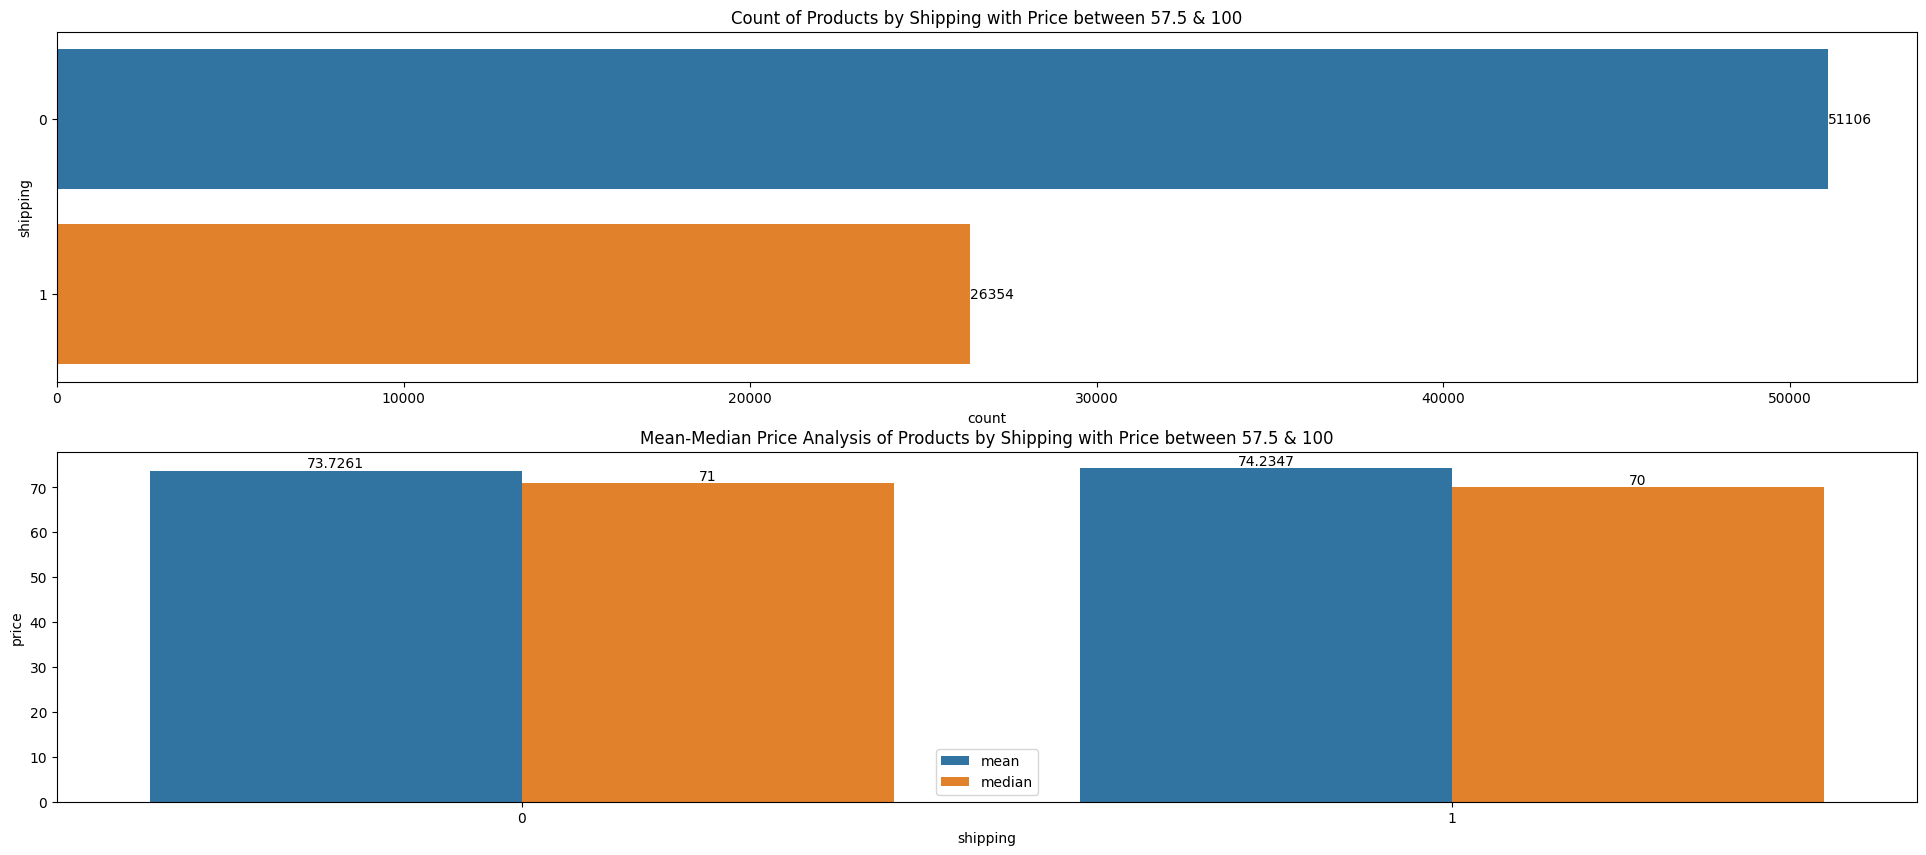

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(24,10))
price_greater_than_t = mercari_df[(mercari_df['price'] > 57.5) & (mercari_df['price'] <= 100)]
sns.countplot(y='shipping', data=price_greater_than_t, ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('Count of Products by Shipping with Price between $57.5 & $100')
df_condition1 = price_greater_than_t.groupby(['shipping']).agg({'price':'mean'}).reset_index()
df_condition1['type'] = 'mean'
df_condition2 = price_greater_than_t.groupby(['shipping']).agg({'price':'median'}).reset_index()
df_condition2['type'] = 'median'
df_condition = pd.concat([df_condition1, df_condition2]).reset_index(drop = True)
df_condition
sns.barplot(data=df_condition, x="shipping", y="price", hue="type")
axes[1].bar_label(axes[1].containers[0])
axes[1].bar_label(axes[1].containers[1])
axes[1].set_title('Mean-Median Price Analysis of Products by Shipping with Price between $57.5 & $100')
plt.legend()
plt.show()

**III. Price Analysis of Products by Shipping with Price > $100**

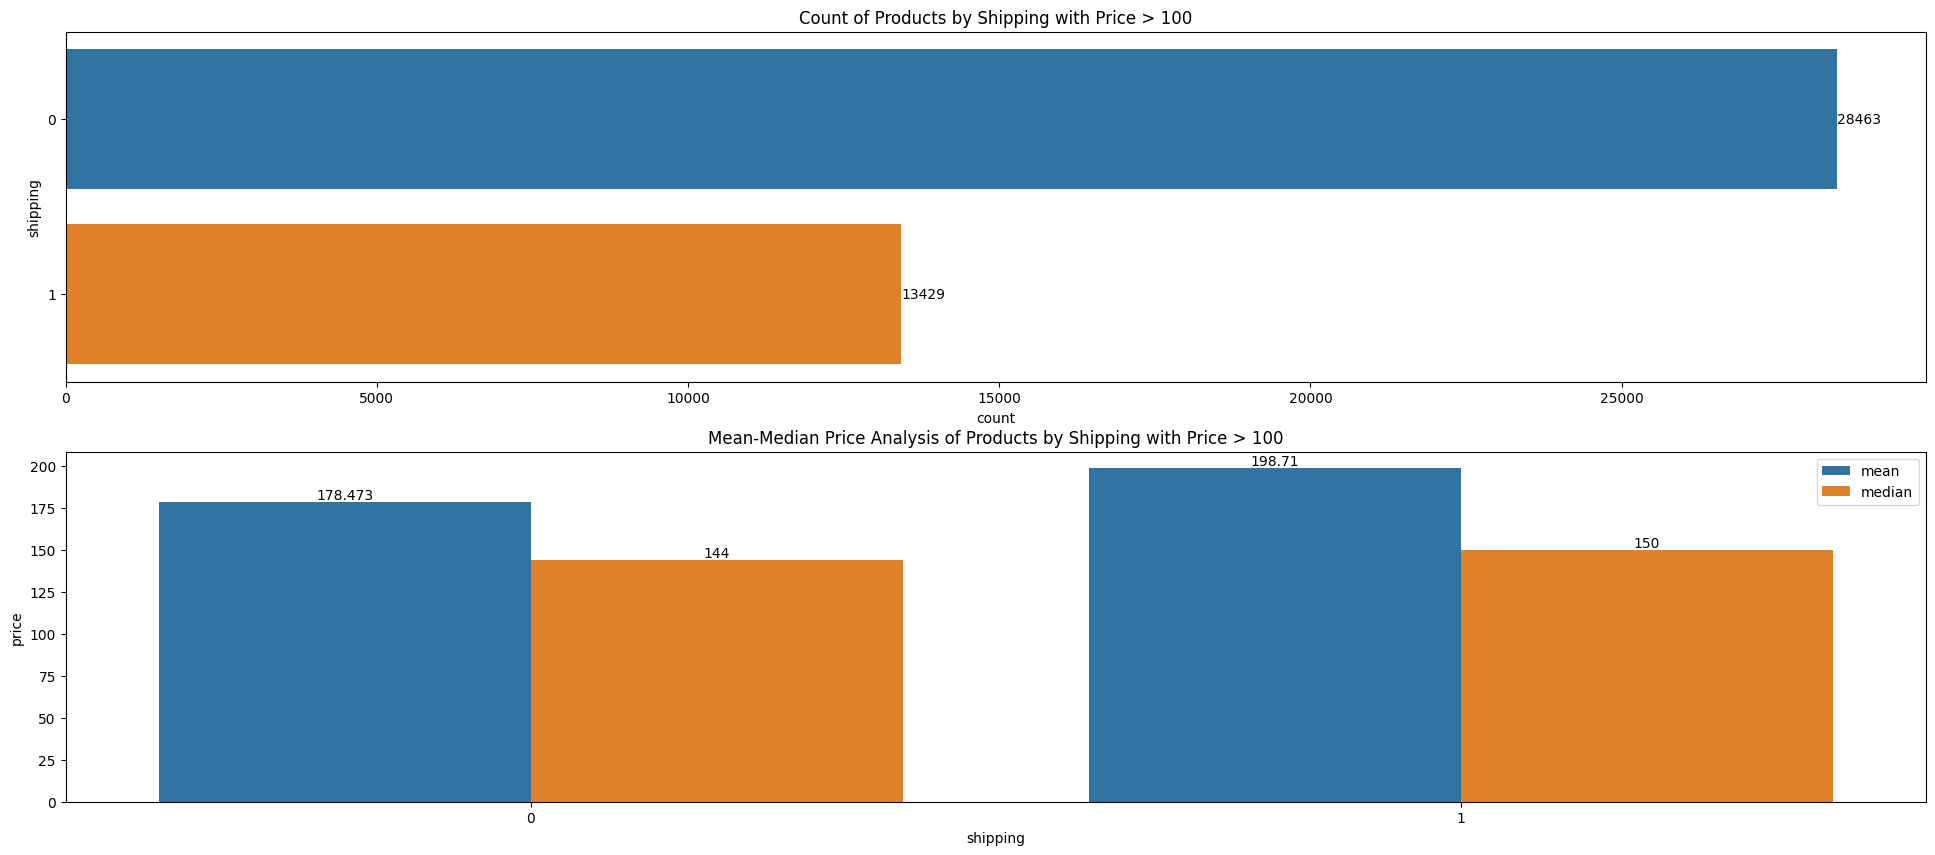

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(24,10))
price_greater_than_t = mercari_df[mercari_df['price'] > 100]
sns.countplot(y='shipping', data=price_greater_than_t, ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('Count of Products by Shipping with Price > $100')
df_condition1 = price_greater_than_t.groupby(['shipping']).agg({'price':'mean'}).reset_index()
df_condition1['type'] = 'mean'
df_condition2 = price_greater_than_t.groupby(['shipping']).agg({'price':'median'}).reset_index()
df_condition2['type'] = 'median'
df_condition = pd.concat([df_condition1, df_condition2]).reset_index(drop = True)
df_condition
sns.barplot(data=df_condition, x="shipping", y="price", hue="type")
axes[1].bar_label(axes[1].containers[0])
axes[1].bar_label(axes[1].containers[1])
axes[1].set_title('Mean-Median Price Analysis of Products by Shipping with Price > $100')
plt.legend()
plt.show()

**Insights:**

    - Irrespective of Price Range of items, for 55% to 75% of the items the customer pays for the shipping.

###***E. Price Analysis of Products by Sub Category 1***

**I. Price Analysis of Products by Sub Category 1 with Price <= $57.5**

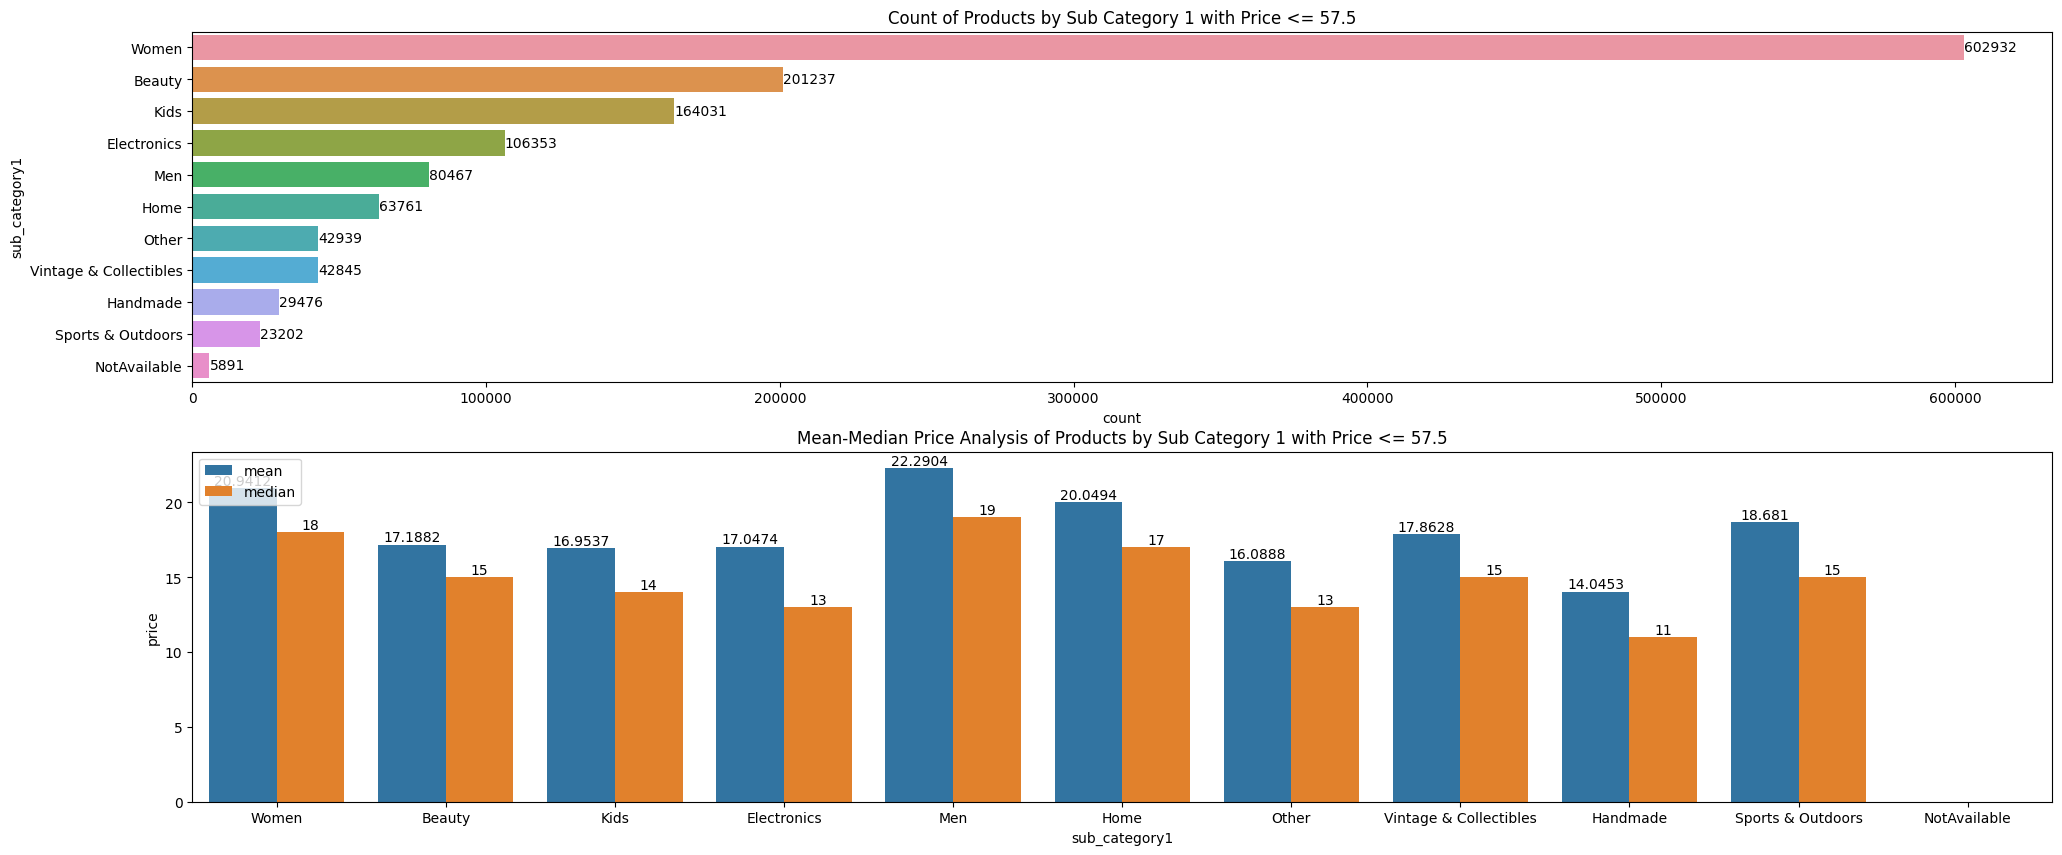

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(24,10))
price_less_than_t = mercari_df[mercari_df['price'] <= 57.5]
sns.countplot(y='sub_category1', data=price_less_than_t, order = price_less_than_t['sub_category1'].value_counts().index, ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('Count of Products by Sub Category 1 with Price <= $57.5')
products = price_less_than_t["sub_category1"].value_counts().index[:10]
df_products1 = price_less_than_t[price_less_than_t['sub_category1'].isin(products)].groupby(['sub_category1']).agg({'price':'mean'}).reset_index()
df_products1['type'] = 'mean'
df_products2 = price_less_than_t[price_less_than_t['sub_category1'].isin(products)].groupby(['sub_category1']).agg({'price':'median'}).reset_index()
df_products2['type'] = 'median'
df_products = pd.concat([df_products1, df_products2]).reset_index(drop = True)
df_products
sns.barplot(data=df_products, x="sub_category1", y="price", order = price_less_than_t['sub_category1'].value_counts().index, hue="type")
axes[1].bar_label(axes[1].containers[0])
axes[1].bar_label(axes[1].containers[1])
axes[1].set_title('Mean-Median Price Analysis of Products by Sub Category 1 with Price <= $57.5')
plt.legend()
plt.show()

**II. Price Analysis of Products by Sub Category 1 with Price between 57.5 & 100 dollars**

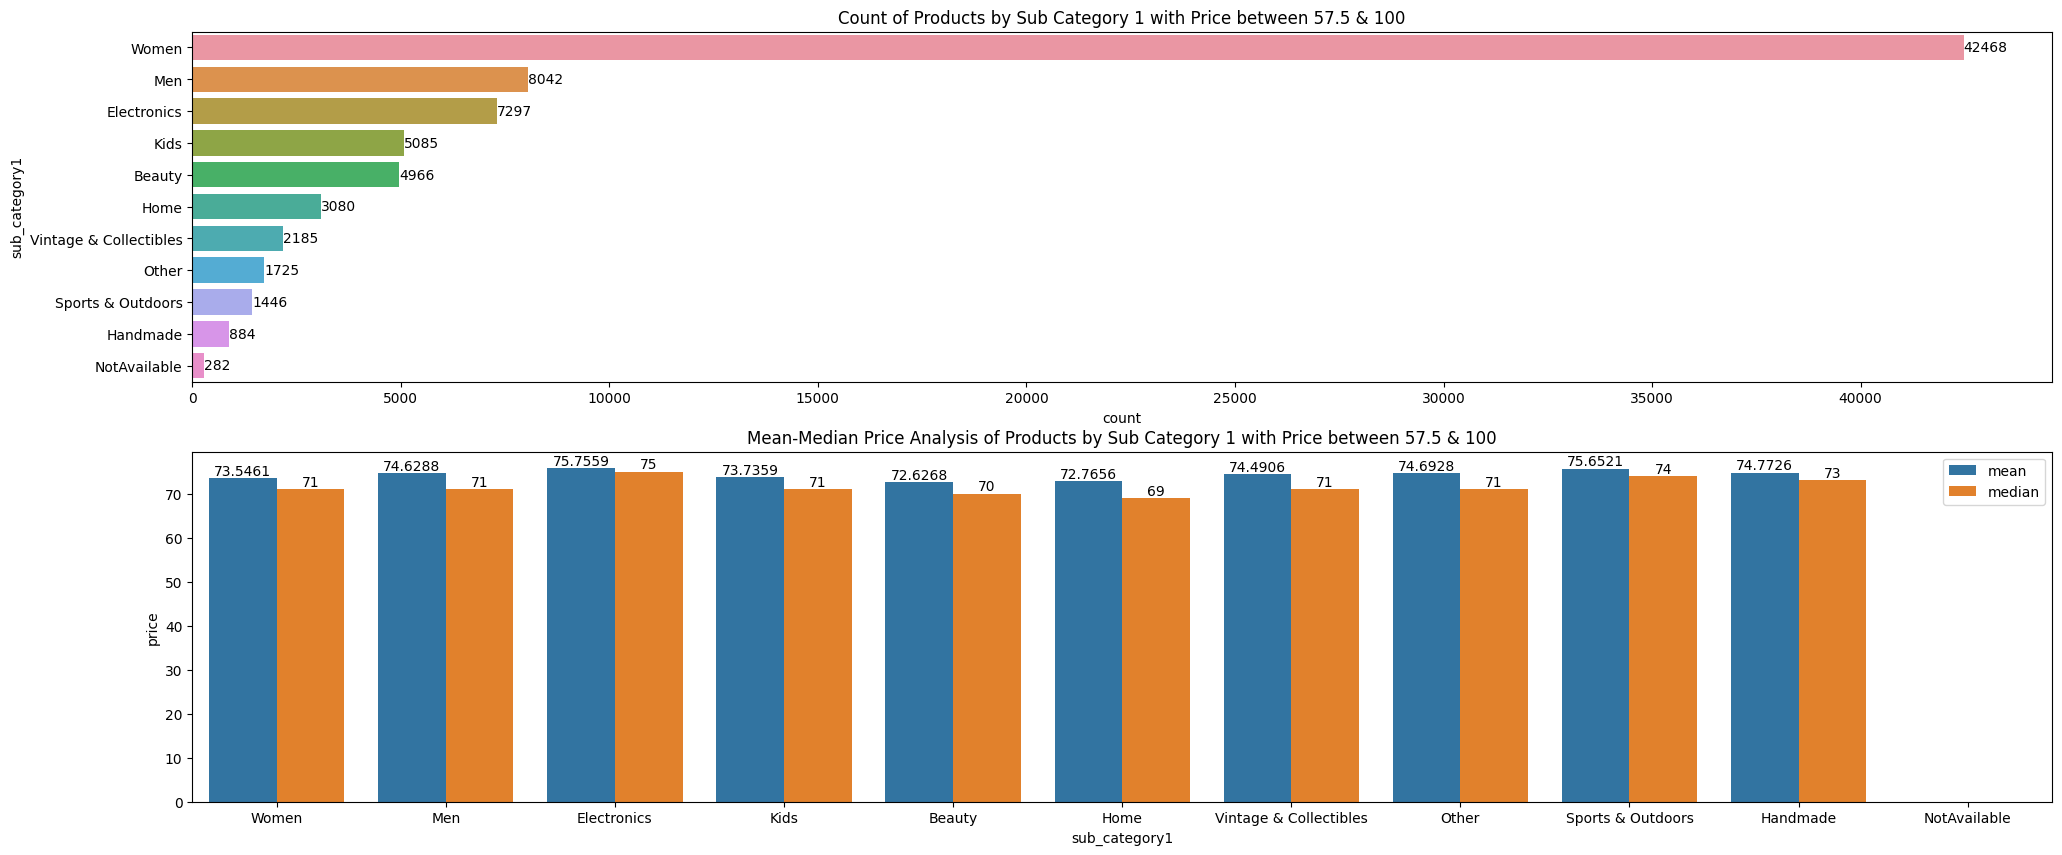

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(24,10))
price_less_than_t = mercari_df[(mercari_df['price'] > 57.5) & (mercari_df['price'] <= 100)]
sns.countplot(y='sub_category1', data=price_less_than_t, order = price_less_than_t['sub_category1'].value_counts().index, ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('Count of Products by Sub Category 1 with Price between $57.5 & $100')
products = price_less_than_t["sub_category1"].value_counts().index[:10]
df_products1 = price_less_than_t[price_less_than_t['sub_category1'].isin(products)].groupby(['sub_category1']).agg({'price':'mean'}).reset_index()
df_products1['type'] = 'mean'
df_products2 = price_less_than_t[price_less_than_t['sub_category1'].isin(products)].groupby(['sub_category1']).agg({'price':'median'}).reset_index()
df_products2['type'] = 'median'
df_products = pd.concat([df_products1, df_products2]).reset_index(drop = True)
df_products
sns.barplot(data=df_products, x="sub_category1", y="price", order = price_less_than_t['sub_category1'].value_counts().index, hue="type")
axes[1].bar_label(axes[1].containers[0])
axes[1].bar_label(axes[1].containers[1])
axes[1].set_title('Mean-Median Price Analysis of Products by Sub Category 1 with Price between $57.5 & $100')
plt.legend()
plt.show()

**III. Price Analysis of Products by Sub Category 1 with Price > $100**

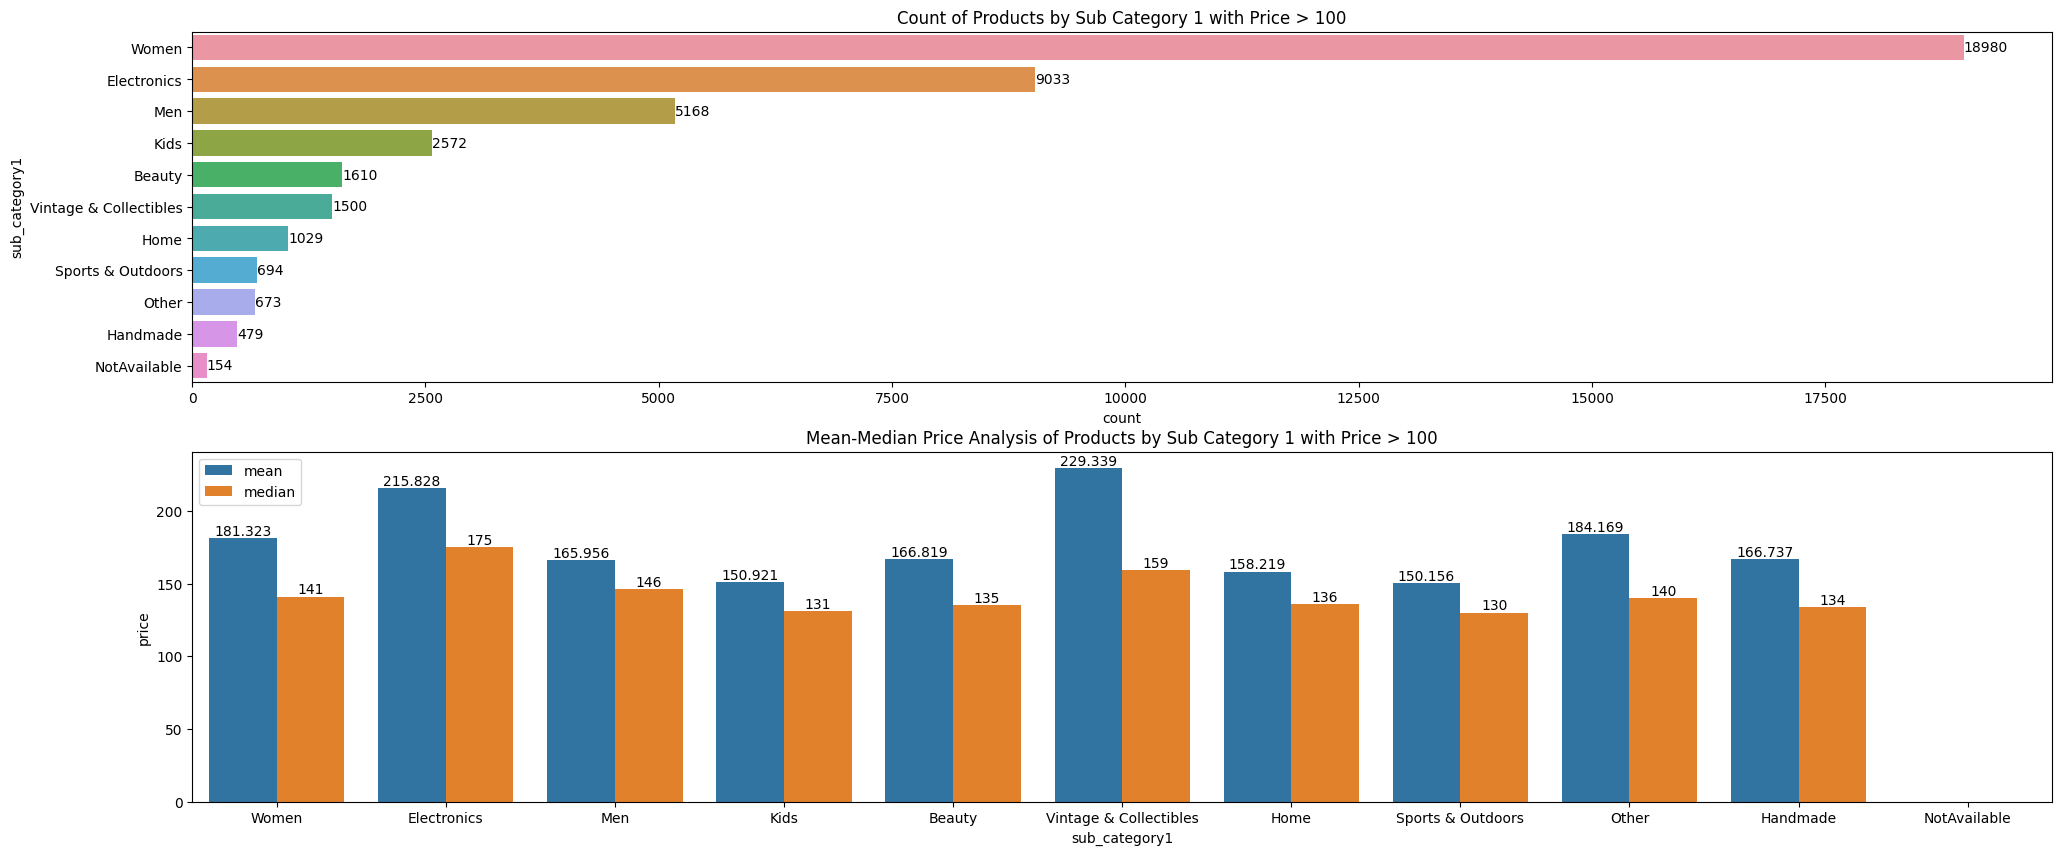

In [ ]:
fig,axes=plt.subplots(2,1,figsize=(24,10))
price_less_than_t = mercari_df[mercari_df['price'] > 100]
sns.countplot(y='sub_category1', data=price_less_than_t, order = price_less_than_t['sub_category1'].value_counts().index, ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
axes[0].set_title('Count of Products by Sub Category 1 with Price > $100')
products = price_less_than_t["sub_category1"].value_counts().index[:10]
df_products1 = price_less_than_t[price_less_than_t['sub_category1'].isin(products)].groupby(['sub_category1']).agg({'price':'mean'}).reset_index()
df_products1['type'] = 'mean'
df_products2 = price_less_than_t[price_less_than_t['sub_category1'].isin(products)].groupby(['sub_category1']).agg({'price':'median'}).reset_index()
df_products2['type'] = 'median'
df_products = pd.concat([df_products1, df_products2]).reset_index(drop = True)
df_products
sns.barplot(data=df_products, x="sub_category1", y="price", order = price_less_than_t['sub_category1'].value_counts().index, hue="type")
axes[1].bar_label(axes[1].containers[0])
axes[1].bar_label(axes[1].containers[1])
axes[1].set_title('Mean-Median Price Analysis of Products by Sub Category 1 with Price > $100')
plt.legend()
plt.show()

**Insights:**

    - Irrespective of Price Range, the Top 5 Categories of products are Women, Kids, Beauty, Electronics and Men.

#**6. Probability Modeling**

### ***A. Price is similar or different based on condition of products***

**Let us first set-up the hypothesis framework**

**Ho:** Price has no effect on the condition id of the product

**H1:** Price has effect on the condition id of the product

**Significance Level(α):** 0.05 or 5%

**Test Statistic:** One Way ANOVA

**ANOVA Tests are massively impacted by outliers, Let's remove these outliers with the help of IQR Method and then run these tests**

In [ ]:
# Outlier Treatment for condition1

condition1 = mercari_df[mercari_df.item_condition_id == 1]

q1 = condition1['price'].quantile(0.25)
q3 = condition1['price'].quantile(0.75)
iqr = q3 - q1
condition1 = condition1[(condition1['price']>(q1 - 1.5*iqr) ) \
                       & (condition1['price']<(q3 + 1.5*iqr))]
condition1 = condition1['price']

In [ ]:
# Outlier Treatment for condition2

condition2 = mercari_df[mercari_df.item_condition_id == 2]

q1 = condition2['price'].quantile(0.25)
q3 = condition2['price'].quantile(0.75)
iqr = q3 - q1
condition2 = condition2[(condition2['price']>(q1 - 1.5*iqr) ) \
                       & (condition2['price']<(q3 + 1.5*iqr))]
condition2 = condition2['price']

In [ ]:
# Outlier Treatment for condition3

condition3 = mercari_df[mercari_df.item_condition_id == 3]

q1 = condition3['price'].quantile(0.25)
q3 = condition3['price'].quantile(0.75)
iqr = q3 - q1
condition3 = condition3[(condition3['price']>(q1 - 1.5*iqr) ) \
                       & (condition3['price']<(q3 + 1.5*iqr))]
condition3 = condition3['price']

In [ ]:
# Outlier Treatment for condition4

condition4 = mercari_df[mercari_df.item_condition_id == 4]

q1 = condition4['price'].quantile(0.25)
q3 = condition4['price'].quantile(0.75)
iqr = q3 - q1
condition4 = condition4[(condition4['price']>(q1 - 1.5*iqr) ) \
                       & (condition4['price']<(q3 + 1.5*iqr))]
condition4 = condition4['price']

In [ ]:
# Outlier Treatment for condition4

condition5 = mercari_df[mercari_df.item_condition_id == 5]

q1 = condition5['price'].quantile(0.25)
q3 = condition5['price'].quantile(0.75)
iqr = q3 - q1
condition5 = condition5[(condition5['price']>(q1 - 1.5*iqr) ) \
                       & (condition5['price']<(q3 + 1.5*iqr))]
condition5 = condition5['price']

**Calculation of Standard Deviation**

- Note that the standard deviation of the population is not known.

- Hence, let us consider a sample size of 1000 across all categories

In [ ]:
sample1 = condition1.sample(1000)
sample2 = condition2.sample(1000)
sample3 = condition3.sample(1000)
sample4 = condition4.sample(1000)
sample5 = condition5.sample(1000)

**Let us now calculate,**

The degree of freedom(**dfn**) for different conditions, and
    
The degree of freedom(**dfd**) for all data points within different conditions

In [ ]:
dfn = 5
dfd = len(sample1) - 1 + len(sample1) - 1 + len(sample1) - 1 + len(sample1) - 1 + len(sample1) - 1

**Critical Region at 95% confidence interval**

In [ ]:
from scipy.stats import f
critical_region = f.ppf(0.95, dfn=dfn, dfd=dfd)
print(f'The critical region for the hypothesis at 95% confidence interval: {critical_region}')

The critical region for the hypothesis at 95% confidence interval: 2.215888955273174


**Let us now calculate the f-statistic based on data points**

In [ ]:
from scipy.stats import f_oneway

f_oneway(sample1, sample2, sample3, sample4, sample5)

F_onewayResult(statistic=21.469967304495214, pvalue=1.3981349805012457e-17)

**Insights:**

    Since, pvalue is lesser than Significance Level(α) i.e 0.05, we reject the
    null hypothesis that - Price has no effect on the condition id of the product.
    
    This implies that at 95% confidence level, the mean price of products is
    statistically different for condition id of the product

### ***B. Effect of Price on who pays for shipping of products***

**Let us first set-up the hypothesis framework**

**Ho:** Price has no effect on who pays for the shipping of the product

**H1:** Price has effect on who pays for the shipping of the product

**Significance Level(α):** 0.05 or 5%

**Test Statistic:** Two Sample T-test

**T-Tests are massively impacted by outliers, Let's remove these outliers with the help of IQR Method and then run these tests**

In [ ]:
# Outlier Treatment for shipping code 0

shipping0 = mercari_df[mercari_df.shipping == 0]

q1 = shipping0['price'].quantile(0.25)
q3 = shipping0['price'].quantile(0.75)
iqr = q3 - q1
shipping0 = shipping0[(shipping0['price']>(q1 - 1.5*iqr) ) \
                       & (shipping0['price']<(q3 + 1.5*iqr))]
shipping0 = shipping0['price']

In [ ]:
# Outlier Treatment for shipping code 1

shipping1 = mercari_df[mercari_df.shipping == 1]

q1 = shipping1['price'].quantile(0.25)
q3 = shipping1['price'].quantile(0.75)
iqr = q3 - q1
shipping1 = shipping1[(shipping1['price']>(q1 - 1.5*iqr) ) \
                       & (shipping1['price']<(q3 + 1.5*iqr))]
shipping1 = shipping1['price']

**Calculation of Standard Deviation**

- Note that the standard deviation of the population is not known.

- Hence, let us consider a sample size of 10000 from both the population

In [ ]:
sample1 = shipping0.sample(10000)
sample2 = shipping1.sample(10000)
print('The sample standard deviation of price for shipping id = 0 is:', round(np.std(sample1),2))
print('The sample standard deviation of price for shipping id = 1 is:', round(np.std(sample2),2))

The sample standard deviation of price for shipping id = 0 is: 12.67
The sample standard deviation of price for shipping id = 1 is: 10.78


- As the sample standard deviations are different, the population standard deviations can be assumed to be different.

- This is a one-tailed test concerning two population means from two independent populations.

- As the population standard deviations are unknown, the two sample independent t-test will be the appropriate test for this problem.

In [ ]:
eq_var = round(np.std(sample1),2) == round(np.std(sample2),2)
alt = ''
if round(np.std(sample1),2) > round(np.std(sample2),2):

  alt = 'greater'

elif round(np.std(sample1),2) < round(np.std(sample2),2):

  alt = 'less'

else:

  alt = ''

In [ ]:
if eq_var:

  t_statistic, p_value = stats.ttest_ind(a=sample1, b=sample2, equal_var=eq_var)

else:

  t_statistic, p_value = stats.ttest_ind(a=sample1, b=sample2, equal_var=eq_var, alternative=alt)

In [ ]:
print(f'The p-value is: {p_value}')

The p-value is: 1.5410180149934703e-274


In [ ]:
print('********************************************** Insights *************************************************')
print(end = '\n')
if p_value > 0.05:

  print('Since, pvalue is greater than Significance Level(α) i.e 0.05, we fail to reject the null hypothesis that -')
  print('There is no significant difference price of products for 2 shipping ids.')
  print(end = '\n')
  print('This implies that at 95% confidence level, ')
  print('Price has no effect on who pays for the shipping of the product.')

else:

  print('Since, pvalue is less than Significance Level(α) i.e 0.05, we reject the null hypothesis that - ')
  print('There is no significant difference price of products for 2 shipping ids.')
  print(end = '\n')
  print('This implies that at 95% confidence level, ')
  print('Price has effect on who pays for the shipping of the product.')

print(end = '\n')
print('***********************************************************************************************************')

********************************************** Insights *************************************************

Since, pvalue is less than Significance Level(α) i.e 0.05, we reject the null hypothesis that - 
There is no significant difference price of products for 2 shipping ids.

This implies that at 95% confidence level, 
Price has effect on who pays for the shipping of the product.

***********************************************************************************************************


###***C. Dependency of Gender on Category of Products***

**Let us first set-up the hypothesis framework**

**Ho:** Gender is independent of Product Category

**H1:** Gender is dependent on Product Category

**Significance Level(α):** 0.05 or 5%

**Test Statistic:** Chi-Square Test of Independence

In [ ]:
df = mercari_df[(mercari_df.sub_category1.isin(['Men','Women'])) & \
 (mercari_df.sub_category2.isin(['Shoes','Athletic Apparel',"Men's Accessories","Women's Accessories", \
                                 'Jeans','Sweaters','Pants','Swimwear']))]

df['sub_category2'].replace(to_replace=["Men's Accessories","Women's Accessories"], \
                                 value="Accessories", inplace = True)

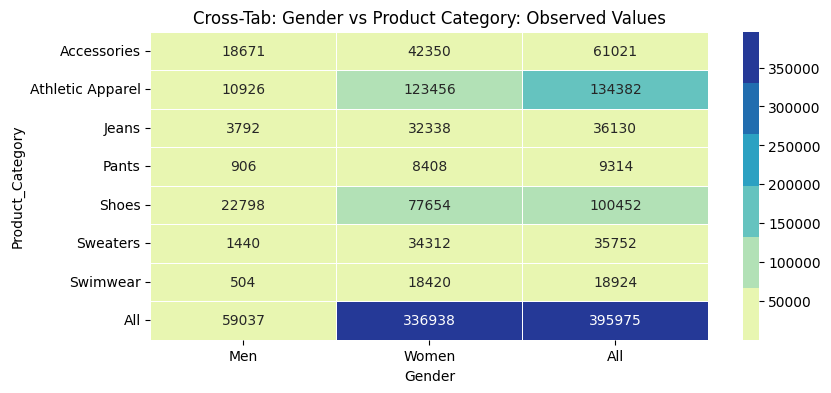

In [ ]:
df = df.rename(columns = {'sub_category1' : 'Gender', 'sub_category2' : 'Product_Category'})
df = pd.crosstab(index=df["Product_Category"], columns=df["Gender"], margins=True)
colormap = sns.color_palette("YlGnBu")
plt.figure(figsize=(9,4))
plt.title('Cross-Tab: Gender vs Product Category: Observed Values')
sns.heatmap(df, annot = True, fmt="d", linewidths=.5, linecolor='white', cmap=colormap)
plt.show()

**Critical Region at 95% confidence interval**

In [ ]:
from scipy.stats import chi2
chi2.ppf(q=0.95, df=6)
print(f'The critical region for the hypothesis at 95% confidence interval: {critical_region}')

The critical region for the hypothesis at 95% confidence interval: 2.215888955273174


**Let us now calculate the χ2-Statistic based on data points**

In [ ]:
from scipy.stats import chi2_contingency

observed = [[18671, 42350],
            [10926, 123456],
            [3792, 32338],
            [906, 8408],
            [22798, 77654],
            [1440, 34312],
            [504, 18420]]

statistic, pvalue, dof, expected_freq = chi2_contingency(observed)

In [ ]:
print(f'The p-value is: {pvalue}')

The p-value is: 0.0


**Insights:**

    Since, pvalue is lesser than Significance Level(α) i.e 0.05, we reject the
    null hypothesis that - Gender is independent of Product Category.
    
    This implies that at 95% confidence level, Gender is dependent on Product Category.

# **7. Word Frequency**

**To figure out the most frequency occuring 'words' or 'bag of words' in the text based attributes in the dataset, we need to perform text cleaning and then vectorize them with the help of Count Vectorizer**

### ***A. Cleaning Text Based Attributes***

In [ ]:
# Importing Stopwords from nltk

stop_words = set(stopwords.words('english'))
mercari_df["item_description"] = mercari_df["item_description"].replace({"No description yet": "NoDescription"})

In [ ]:
for attribute in ['item_description','name','sub_category1','sub_category2','sub_category3','brand_name']:
  cleaned_words = []
  for sentence in mercari_df[attribute]:
    sentence = sentence.lower()
    sentence = re.sub('[^A-Za-z0-9]+', ' ', sentence)
    sentence = ' '.join(word for word in sentence.split() if word not in stop_words)

    cleaned_words.append(sentence.strip())

  mercari_df[attribute] = cleaned_words


In [ ]:
mercari_df.head(10)

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,sub_category1,sub_category2,sub_category3
0,mlb cincinnati reds shirt size xl,3,Men/Tops/T-shirts,notavailable,10.0,1,nodescription,men,tops,shirts
1,razer blackwidow chroma keyboard,3,Electronics/Computers & Tablets/Components & P...,razer,52.0,0,keyboard great condition works like came box p...,electronics,computers tablets,components parts
2,ava viv blouse,1,Women/Tops & Blouses/Blouse,target,10.0,1,adorable top hint lace key hole back pale pink...,women,tops blouses,blouse
3,leather horse statues,1,Home/Home Décor/Home Décor Accents,notavailable,35.0,1,new tags leather horses retail rm stand foot h...,home,home cor,home cor accents
4,24k gold plated rose,1,Women/Jewelry/Necklaces,notavailable,44.0,0,complete certificate authenticity,women,jewelry,necklaces
5,bundled items requested ruie,3,Women/Other/Other,notavailable,59.0,0,banana republic bottoms candies skirt matching...,women,others,
6,acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,acacia swimwear,64.0,0,size small straps slightly shortened fit xs be...,women,swimwear,two piece
7,girls cheer tumbling bundle 7,3,Sports & Outdoors/Apparel/Girls,soffe,6.0,1,get three pairs sophie cheer shorts size small...,sports outdoors,apparel,girls
8,girls nike pro shorts,3,Sports & Outdoors/Apparel/Girls,nike,19.0,0,girls size small plus green three shorts total,sports outdoors,apparel,girls
9,porcelain clown doll checker pants vtg,3,Vintage & Collectibles/Collectibles/Doll,notavailable,8.0,0,realized pants backwards picture dirty hand wa...,vintage collectibles,collectibles,doll


### ***B. Frequently Occuring Words or Bag of Words in Name Column***

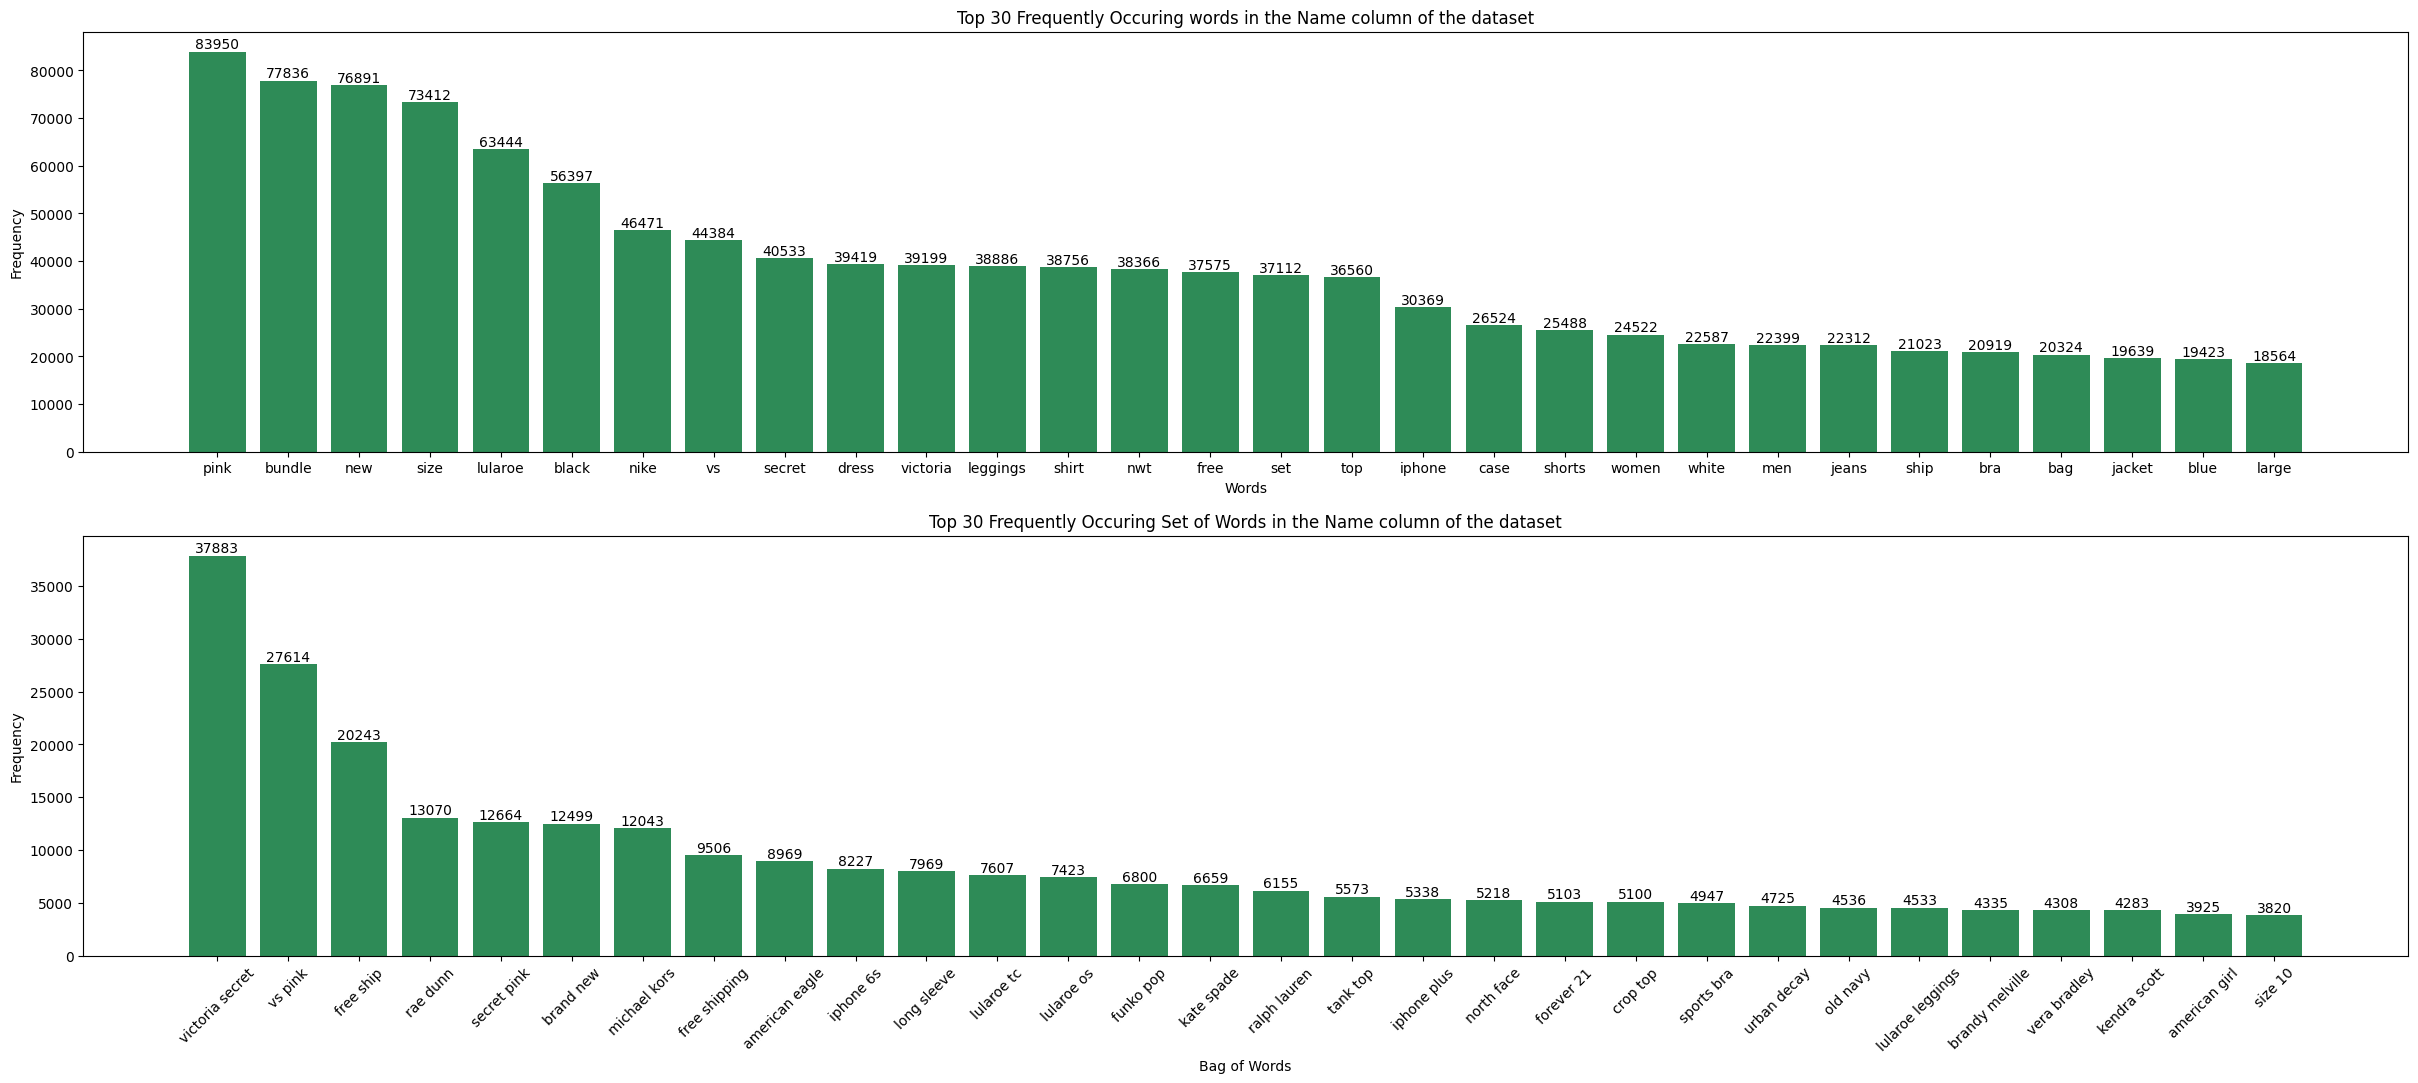

In [ ]:
vectorizer1 = CountVectorizer(min_df=10, max_features=20000)
vectorized_attr1 = vectorizer1.fit_transform(mercari_df["name"])
df1 = pd.DataFrame()
df1["words"] = vectorizer1.get_feature_names_out()
df1["frequency"] = np.asarray(vectorized_attr1.sum(axis=0))[0]
x1 = df1.sort_values("frequency", axis=0, ascending=False).head(30)["words"]
y1 = df1.sort_values("frequency", axis=0, ascending=False).head(30)["frequency"]
vectorizer2 = CountVectorizer(min_df=30, ngram_range=(2, 2), max_features=10000)
vectorized_attr2 = vectorizer2.fit_transform(mercari_df["name"])
df2 = pd.DataFrame()
df2["words"] = vectorizer2.get_feature_names_out()
df2["frequency"] = np.asarray(vectorized_attr2.sum(axis=0))[0]
x2 = df2.sort_values("frequency", axis=0, ascending=False).head(30)["words"]
y2 = df2.sort_values("frequency", axis=0, ascending=False).head(30)["frequency"]
fig, ax = plt.subplots(2,1,figsize=(30, 12))
ax[0].bar(x1, y1, color = 'seagreen')
ax[0].bar_label(ax[0].containers[0])
ax[0].set_title('Top 30 Frequently Occuring words in the Name column of the dataset')
ax[0].set_xlabel('Words')
ax[0].set_ylabel('Frequency')
ax[1].bar(x2, y2, color = 'seagreen')
ax[1].bar_label(ax[1].containers[0])
ax[1].set_title('Top 30 Frequently Occuring Set of Words in the Name column of the dataset')
ax[1].set_xlabel('Bag of Words')
ax[1].set_ylabel('Frequency')
plt.xticks(rotation = 45)
plt.show()

### **C. Frequently Occuring Words or Bag of Words in Item Description Column**

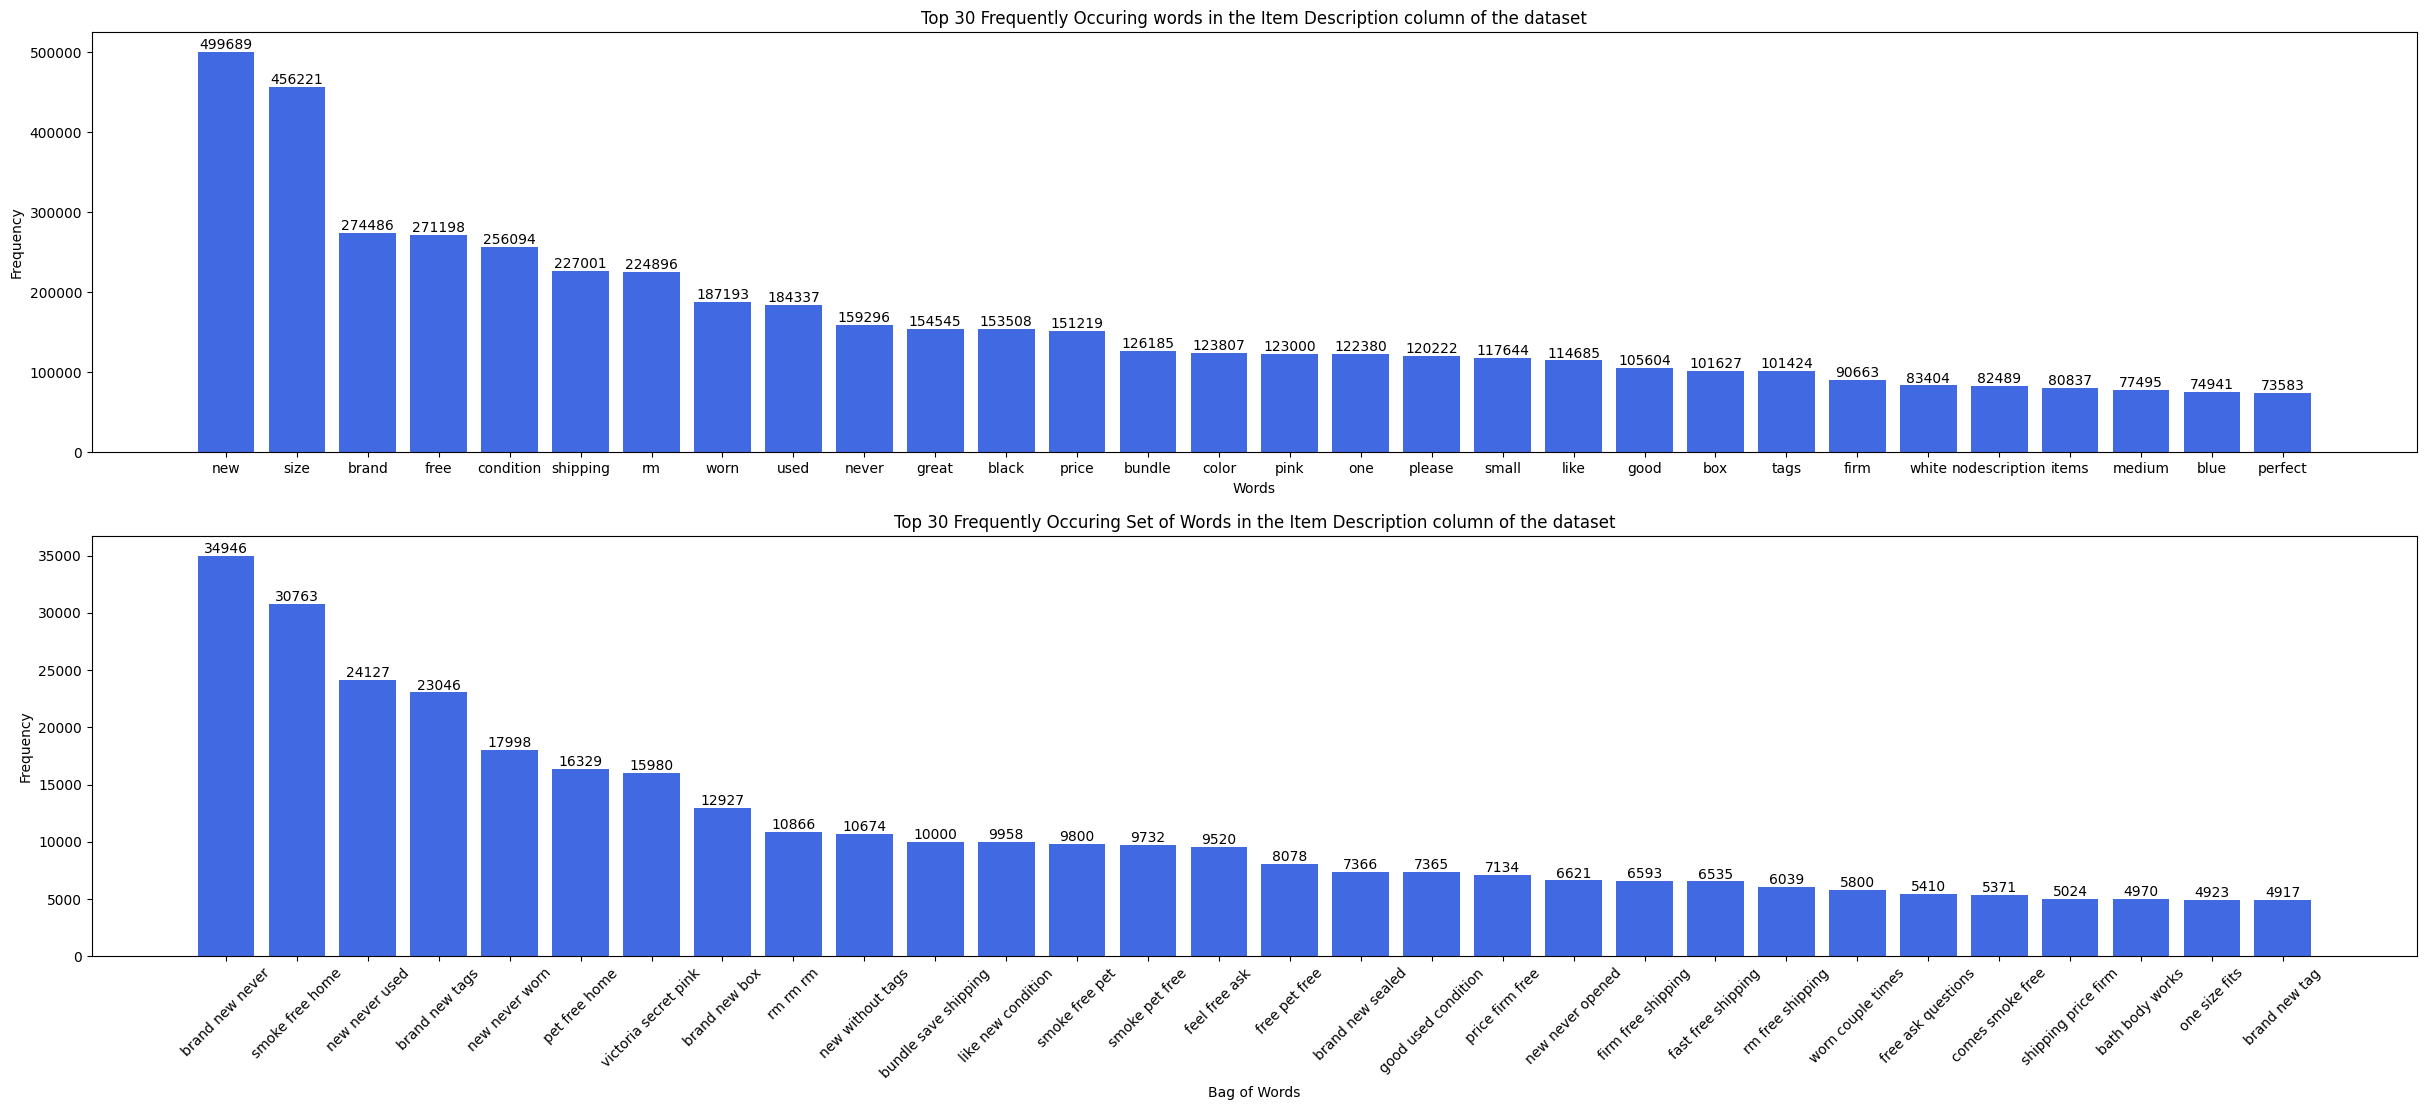

In [ ]:
vectorizer1 = CountVectorizer(min_df=10, max_features=20000)
vectorized_attr1 = vectorizer1.fit_transform(mercari_df["item_description"])
df1 = pd.DataFrame()
df1["words"] = vectorizer1.get_feature_names_out()
df1["frequency"] = np.asarray(vectorized_attr1.sum(axis=0))[0]
x1 = df1.sort_values("frequency", axis=0, ascending=False).head(30)["words"]
y1 = df1.sort_values("frequency", axis=0, ascending=False).head(30)["frequency"]
vectorizer2 = CountVectorizer(min_df=30, ngram_range=(3, 3), max_features=10000)
vectorized_attr2 = vectorizer2.fit_transform(mercari_df["item_description"])
df2 = pd.DataFrame()
df2["words"] = vectorizer2.get_feature_names_out()
df2["frequency"] = np.asarray(vectorized_attr2.sum(axis=0))[0]
x2 = df2.sort_values("frequency", axis=0, ascending=False).head(30)["words"]
y2 = df2.sort_values("frequency", axis=0, ascending=False).head(30)["frequency"]
fig, ax = plt.subplots(2,1,figsize=(30, 12))
ax[0].bar(x1, y1, color = 'royalblue')
ax[0].bar_label(ax[0].containers[0])
ax[0].set_title('Top 30 Frequently Occuring words in the Item Description column of the dataset')
ax[0].set_xlabel('Words')
ax[0].set_ylabel('Frequency')
ax[1].bar(x2, y2, color = 'royalblue')
ax[1].bar_label(ax[1].containers[0])
ax[1].set_title('Top 30 Frequently Occuring Set of Words in the Item Description column of the dataset')
ax[1].set_xlabel('Bag of Words')
ax[1].set_ylabel('Frequency')
plt.xticks(rotation = 45)
plt.show()

**Insights:**

    - Bag of words in the item description column seem to suggest that most of the items sold on Mercari
    are brand new or never worn or hardly used. Some of the items are shipped at free of cost or sold in bundles.

# **8. Price Prediction**

**For Price Prediction of products, we will consider a fraction(10%) of the dataset and then run our models**

In [ ]:
mercari_df = mercari_df.sample(frac = 0.1)

### ***A. Input and Output Columns***

In [ ]:
X = mercari_df.drop(columns = ['price'])
y = np.log1p(mercari_df['price'])

### ***B. Test Train Split***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### ***C. Vectorizing Input Columns***

In [ ]:
# Function to tranform and vectorize training data

def vectorize_train_test_data(df_train, df_test):

  binarized_attrs1 = []
  binarized_attrs2 = []
  vectorized_attrs1 = []
  vectorized_attrs2 = []

  for attr in ['item_condition_id','category_name','brand_name','shipping','sub_category1','sub_category2','sub_category3']:

      binary_obj = LabelBinarizer(sparse_output=True)
      binarized_attr1 = binary_obj.fit_transform(df_train[attr])
      binarized_attrs1.append(binarized_attr1)
      binarized_attr2 = binary_obj.transform(df_test[attr])
      binarized_attrs2.append(binarized_attr2)



  for attr in ['name', 'item_description']:

    vectorizer = CountVectorizer(min_df=10, max_features=30000)
    vectorized_attr1 = vectorizer.fit_transform(df_train[attr])
    vectorized_attrs1.append(vectorized_attr1)
    vectorized_attr2 = vectorizer.transform(df_test[attr])
    vectorized_attrs2.append(vectorized_attr2)


    if attr == 'name':
      vectorizer = CountVectorizer(min_df=20, ngram_range=(2, 2), max_features=20000)
      vectorized_attr1 = vectorizer.fit_transform(df_train[attr])
      vectorized_attrs1.append(vectorized_attr1)
      vectorized_attr2 = vectorizer.transform(df_test[attr])
      vectorized_attrs2.append(vectorized_attr2)

    else:

      vectorizer = CountVectorizer(min_df=30, ngram_range=(3, 3), max_features=10000)
      vectorized_attr1 = vectorizer.fit_transform(df_train[attr])
      vectorized_attrs1.append(vectorized_attr1)
      vectorized_attr2 = vectorizer.transform(df_test[attr])
      vectorized_attrs2.append(vectorized_attr2)


  X_train = hstack((binarized_attrs1[0], binarized_attrs1[1], binarized_attrs1[2],
                            binarized_attrs1[3], binarized_attrs1[4], binarized_attrs1[5],
                            binarized_attrs1[6], vectorized_attrs1[0], vectorized_attrs1[1],
                            vectorized_attrs1[2], vectorized_attrs1[3])).tocsr()

  X_test = hstack((binarized_attrs2[0], binarized_attrs2[1], binarized_attrs2[2],
                            binarized_attrs2[3], binarized_attrs2[4], binarized_attrs2[5],
                            binarized_attrs2[6], vectorized_attrs2[0], vectorized_attrs2[1],
                            vectorized_attrs2[2], vectorized_attrs2[3])).tocsr()


  return X_train, X_test

In [ ]:
X_train, X_test = vectorize_train_test_data(X_train, X_test)

### ***D. Designing the Neural Network Layer***

In [ ]:
model = Sequential([
    Dense(144, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(360, kernel_initializer='normal', activation='relu'),
    Dropout(0.2),
    Dense(240, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])

### ***E. Defining Error Metric***

In [ ]:
msle = MeanSquaredLogarithmicError()
model.compile(loss=msle, optimizer=Adam(learning_rate=0.01), metrics=[msle])

### ***F. Training the Model***

In [ ]:
training_model = model.fit(
    X_train.toarray(),
    y_train.values,
    epochs=100,
    batch_size=64,
    validation_split=0.25
)

Epoch 1/100
1303/1303 [==============================] - 19s 12ms/step - loss: 0.0287 - mean_squared_logarithmic_error: 0.0287 - val_loss: 0.0202 - val_mean_squared_logarithmic_error: 0.0202
Epoch 2/100
1303/1303 [==============================] - 9s 7ms/step - loss: 0.0181 - mean_squared_logarithmic_error: 0.0181 - val_loss: 0.0174 - val_mean_squared_logarithmic_error: 0.0174
Epoch 3/100
1303/1303 [==============================] - 10s 7ms/step - loss: 0.0146 - mean_squared_logarithmic_error: 0.0146 - val_loss: 0.0169 - val_mean_squared_logarithmic_error: 0.0169
Epoch 4/100
1303/1303 [==============================] - 9s 7ms/step - loss: 0.0121 - mean_squared_logarithmic_error: 0.0121 - val_loss: 0.0168 - val_mean_squared_logarithmic_error: 0.0169
Epoch 5/100
1303/1303 [==============================] - 9s 7ms/step - loss: 0.0110 - mean_squared_logarithmic_error: 0.0110 - val_loss: 0.0171 - val_mean_squared_logarithmic_error: 0.0171
Epoch 6/100
1303/1303 [=============================

### ***G. Error Comparison - Training vs Validation***

In [ ]:
def training_vs_validation_plot(training_model):
  plt.plot(training_model.history['mean_squared_logarithmic_error'], color = 'orange')
  plt.plot(training_model.history['val_mean_squared_logarithmic_error'], color = 'red')
  plt.xlabel("Number of Epochs")
  plt.ylabel('Mean Square Logarithmic Error')
  plt.legend(['Training', 'Validation'])
  plt.title('Mean Square Logarithmic Error - Training vs Validation')
  plt.show()

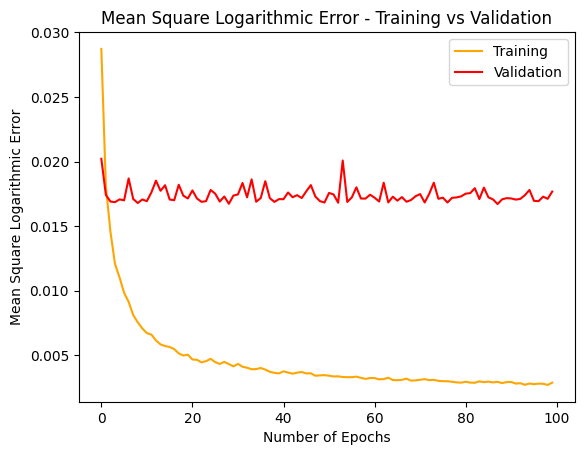

In [ ]:
training_vs_validation_plot(training_model)

### ***H. Prediction Results***

In [ ]:
prediction_df = pd.DataFrame()
prediction_df['Actual_Price'] = np.expm1(np.array(y_test))
prediction_df['Prediction_Price'] = np.expm1(model.predict(X_test))
prediction_df.head(10)

1159/1159 [==============================] - 2s 2ms/step


,Actual_Price,Prediction_Price
0,9.0,12.617744
1,40.0,41.729702
2,11.0,16.773975
3,26.0,20.225857
4,4.0,9.791815
5,46.0,72.391617
6,4.0,4.215047
7,16.0,12.057776
8,86.0,30.508047
9,19.0,14.422632


# References

1. Basics of CountVectorizer : https://towardsdatascience.com/basics-of-countvectorizer-e26677900f9c

2. Label Binarizer: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html

3. Regression Analysis using ANN in Tensorflow: https://www.analyticsvidhya.com/blog/2021/08/a-walk-through-of-regression-analysis-using-artificial-neural-networks-in-tensorflow/